In [1]:
## using kaggle for data set download and some analysis prcatice]

### This data is about trends in social media hashtags, likes, shares and comments
# there are 5000 posts that have been analysed in total
import pandas as pd ## reading data
import numpy as np ## transform and maths
import matplotlib.pyplot as mpl ## visualisation
import seaborn as sns ## visual
import plotly.express as px # 3d and gif visual

## loading dataset
socials = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Analysis_practice/Viral_Social_Media_Trends.csv")
socials = socials.rename({'Post_ID':'Post_ID','Platform':'Platform','Hashtag':'Hashtag','Content_Type':'Content_Type','Region':'Region','Likes':'Likes','Shares':'Shares','Comments':'Comments','Engagement_Level':'Engagement_Level'})
len(socials)



5000

Basic information finding

In [ ]:
socials.shape ##  gives number of rows and columns

(5000, 10)

In [ ]:
socials.info() ## shows if any values may be missing if size of dataset is known

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Post_ID           5000 non-null   object
 1   Platform          5000 non-null   object
 2   Hashtag           5000 non-null   object
 3   Content_Type      5000 non-null   object
 4   Region            5000 non-null   object
 5   Views             5000 non-null   int64 
 6   Likes             5000 non-null   int64 
 7   Shares            5000 non-null   int64 
 8   Comments          5000 non-null   int64 
 9   Engagement_Level  5000 non-null   object
dtypes: int64(4), object(6)
memory usage: 429.7+ KB


In [ ]:
## check for missing values
socials.isnull().sum()


## if something is missing, you can either drop the point
# OR
# if the missing value is numeric, then you can fill it with an average of some time

#socials.fillna(socials.mean(numeric_only=True), inplace = True)
#socials.fillna('Hashtag':'Unknown', inplace = True)

SyntaxError: invalid syntax (<ipython-input-4-0d54753813c4>, line 9)

Checking basic summary statistics

In [ ]:
socials.describe()  ## gives summary of all numeric values


# to also include non-numeric:
socials.describe(include = 'all')

,Post_ID,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
count,5000,5000,5000,5000,5000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000
unique,5000,4,10,6,8,NaN,NaN,NaN,NaN,3
top,Post_1,YouTube,#Fitness,Live Stream,USA,NaN,NaN,NaN,NaN,Low
freq,1,1324,536,855,677,NaN,NaN,NaN,NaN,1729
mean,NaN,NaN,NaN,NaN,NaN,2.494066e+06,251475.029800,50519.562000,24888.393800,NaN
std,NaN,NaN,NaN,NaN,NaN,1.459490e+06,144349.583384,29066.362671,14284.504319,NaN
min,NaN,NaN,NaN,NaN,NaN,1.266000e+03,490.000000,52.000000,18.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,1.186207e+06,126892.250000,25029.000000,12305.250000,NaN
50%,NaN,NaN,NaN,NaN,NaN,2.497373e+06,249443.000000,50839.500000,25004.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,3.759781e+06,373970.750000,75774.250000,37072.750000,NaN


In [2]:
num = ['Views', 'Likes', 'Shares', 'Comments'] ### the only numeric values

In [ ]:
## descriptive stats
ds = ({'Mean\n':socials[num].mean(),
       'Median\n':socials[num].median(),
       'Mode\n':socials[num].mode(),
       'Variance\n':socials[num].var(),
       'Standard Deviation\n':socials[num].std(),
       'Skewness\n':socials[num].skew(),
       'Kurtosis\n':socials[num].kurt()
       }) ## may get error if not specified to numeric only --- kurt = tailedness and extent of the range

print(ds)

{'Mean\n': Views       2.494066e+06
Likes       2.514750e+05
Shares      5.051956e+04
Comments    2.488839e+04
dtype: float64, 'Median\n': Views       2497373.0
Likes        249443.0
Shares        50839.5
Comments      25004.0
dtype: float64, 'Mode\n':         Views   Likes   Shares  Comments
0   1358058.0   34145  34856.0    1905.0
1   1655182.0   36572  96016.0   13106.0
2   2737221.0   43890      NaN   13429.0
3   3283134.0   50849      NaN   20155.0
4         NaN   51266      NaN   25488.0
5         NaN   87132      NaN   28304.0
6         NaN   90120      NaN   33207.0
7         NaN  123912      NaN   43357.0
8         NaN  155459      NaN       NaN
9         NaN  160629      NaN       NaN
10        NaN  187743      NaN       NaN
11        NaN  210072      NaN       NaN
12        NaN  210894      NaN       NaN
13        NaN  247328      NaN       NaN
14        NaN  260597      NaN       NaN
15        NaN  267582      NaN       NaN
16        NaN  274462      NaN       NaN
17       

Univariate analysis

Text(0.5, 1.0, 'Distributions of engagement metrics')

<Figure size 1500x400 with 0 Axes>

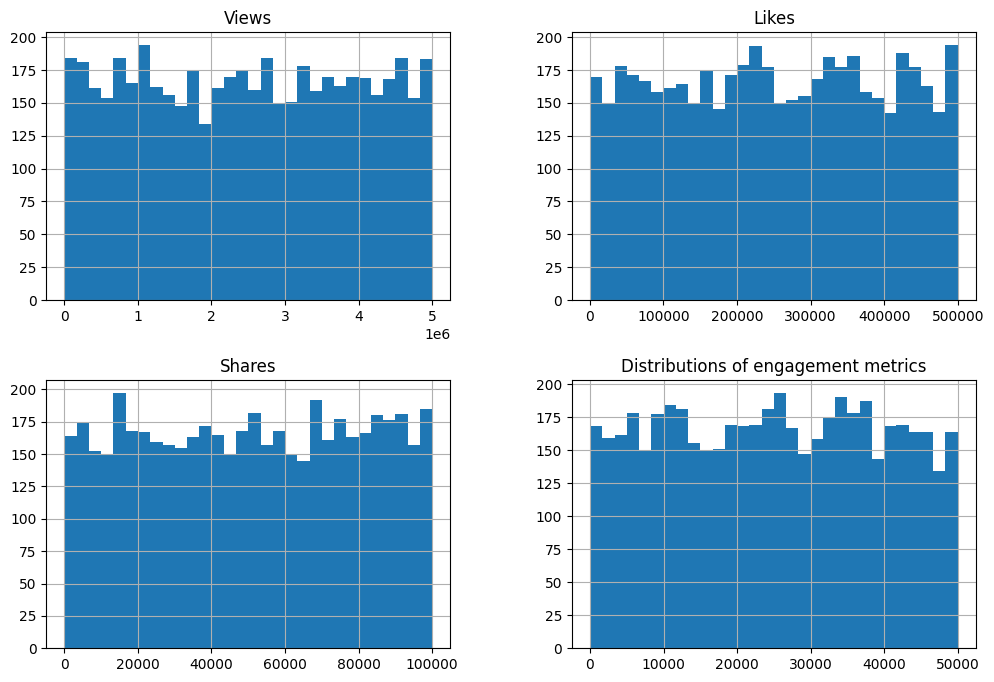

In [ ]:
mpl.figure(figsize=(15, 4)) ## defines the figure size  the 4 is how many graphs there are
## this is the same as par mfrow in r
socials[['Views', 'Likes', 'Shares', 'Comments']].hist(bins=30, figsize=(12,8)) ## will create a histogram for these
mpl.title("Distributions of engagement metrics")

Platform use per region

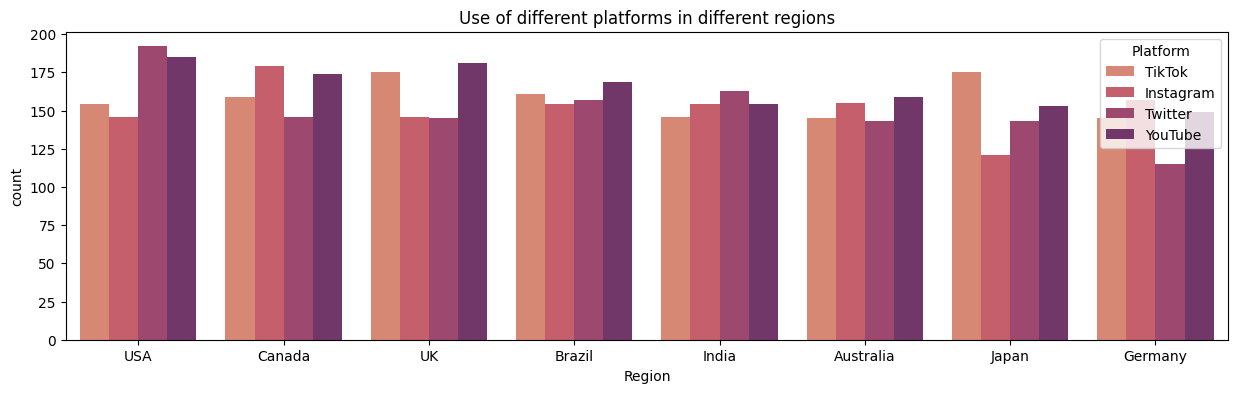

In [ ]:
import matplotlib.pyplot as mpl
import seaborn as sns

mpl.figure(figsize=(15, 4))
sns.countplot(data=socials, x='Region', hue='Platform', palette='flare', order=socials['Region'].value_counts().index) ## countplot as both discrete datasets
mpl.title("Use of different platforms in different regions")
mpl.show()

Platform boxplots

<ipython-input-27-f5c8a5d227c4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=socials, x='Platform', palette='flare', order=socials['Platform'].value_counts().index) ## sns because it's from seaborn


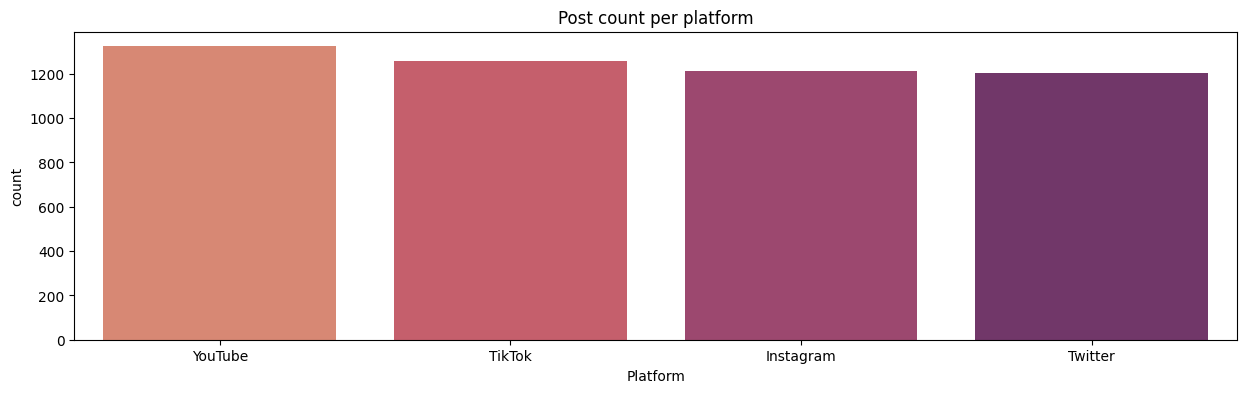

In [ ]:
import matplotlib.pyplot as mpl
import seaborn as sns

mpl.figure(figsize=(15, 4))
sns.countplot(data=socials, x='Platform', palette='flare', order=socials['Platform'].value_counts().index) ## sns because it's from seaborn
## palette = colours, can be any this is just an example
mpl.title("Post count per platform")
mpl.show()


<ipython-input-28-8653ccb2e94e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=socials, x='Platform', y='Likes', palette='flare', order=socials['Platform'].value_counts().index) ## sns because it's from seaborn


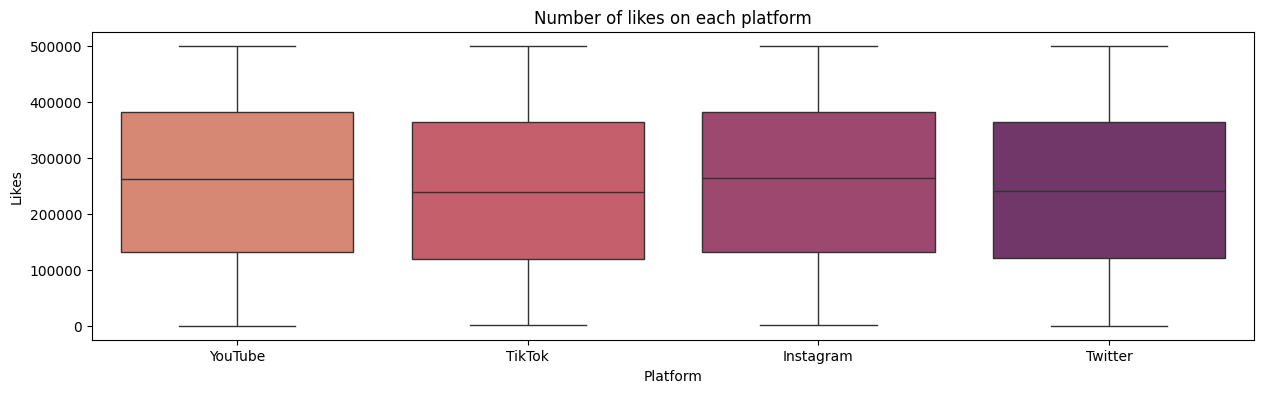

In [ ]:
import matplotlib.pyplot as mpl
import seaborn as sns
mpl.figure(figsize=(15, 4))
sns.boxplot(data=socials, x='Platform', y='Likes', palette='flare', order=socials['Platform'].value_counts().index) ## sns because it's from seaborn
mpl.title("Number of likes on each platform")
mpl.show()

<ipython-input-30-ff629cb8640a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=socials, x='Platform', y='Shares', palette='flare', order=socials['Platform'].value_counts().index) ## sns because it's from seaborn


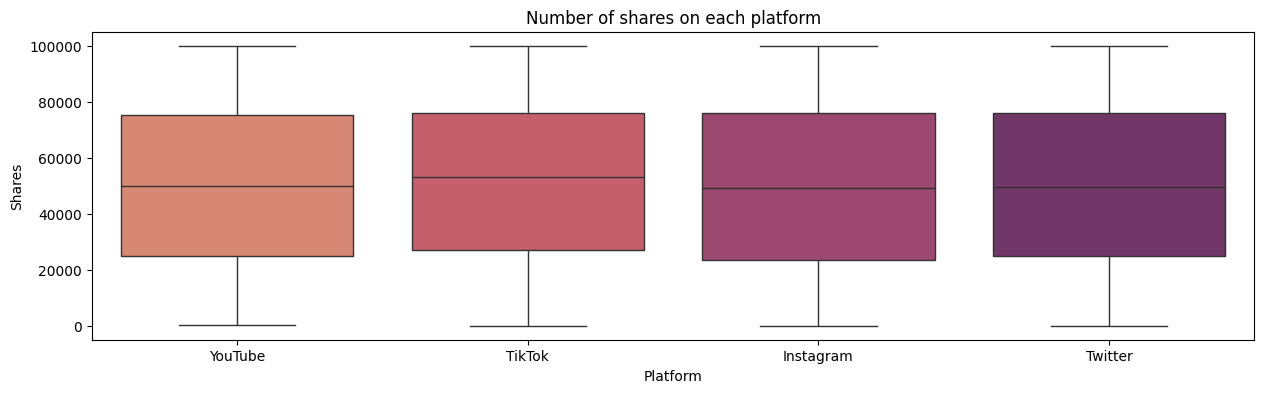

In [ ]:
import matplotlib.pyplot as mpl
import seaborn as sns
mpl.figure(figsize=(15, 4))
sns.boxplot(data=socials, x='Platform', y='Shares', palette='flare', order=socials['Platform'].value_counts().index) ## sns because it's from seaborn
mpl.title("Number of shares on each platform")
mpl.show()

<ipython-input-31-1eb31691bf01>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=socials, x='Platform', y='Comments', palette='flare', order=socials['Platform'].value_counts().index) ## sns because it's from seaborn


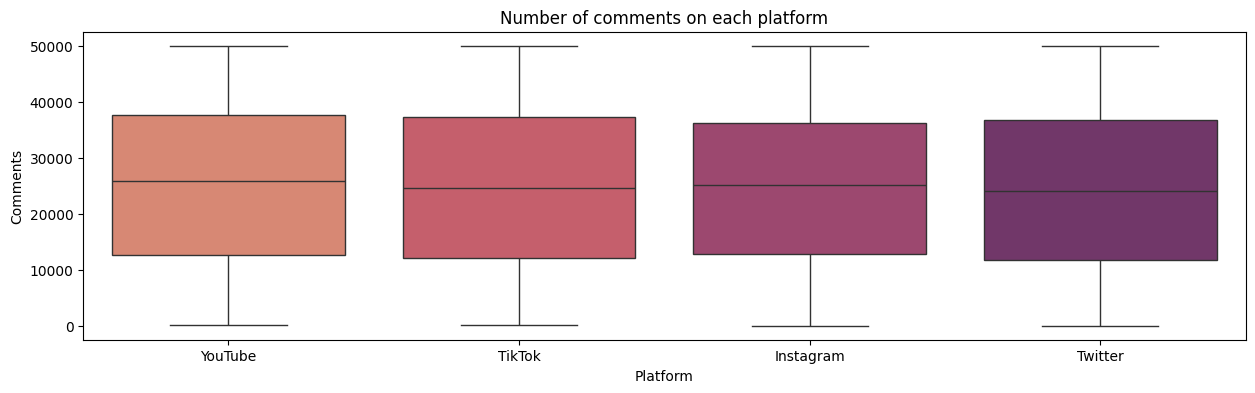

In [ ]:
import matplotlib.pyplot as mpl
import seaborn as sns
mpl.figure(figsize=(15, 4))
sns.boxplot(data=socials, x='Platform', y='Comments', palette='flare', order=socials['Platform'].value_counts().index) ## sns because it's from seaborn
mpl.title("Number of comments on each platform")
mpl.show()

<ipython-input-32-3e97017562b0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=socials, x='Platform', y='Views', palette='flare', order=socials['Platform'].value_counts().index) ## sns because it's from seaborn


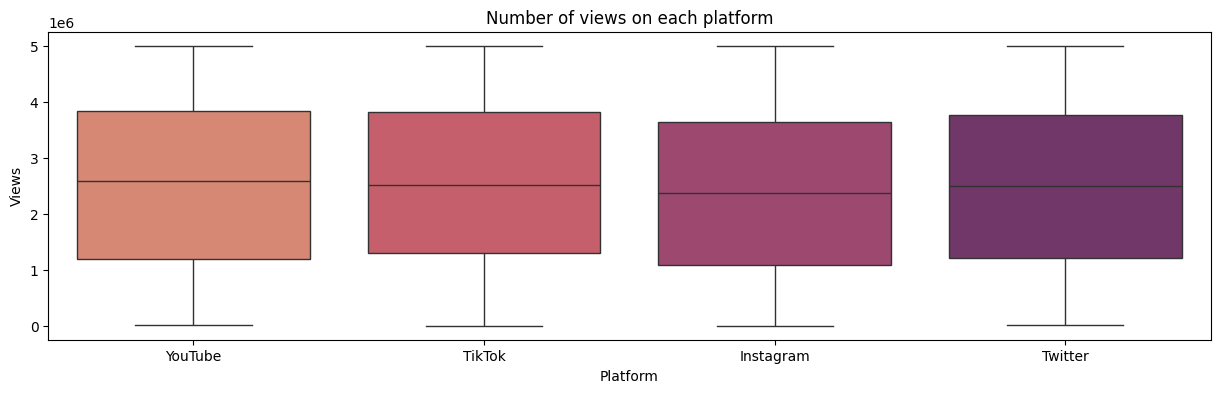

In [ ]:
import matplotlib.pyplot as mpl
import seaborn as sns
mpl.figure(figsize=(15, 4))
sns.boxplot(data=socials, x='Platform', y='Views', palette='flare', order=socials['Platform'].value_counts().index) ## sns because it's from seaborn
mpl.title("Number of views on each platform")
mpl.show()

Boxplots on hashtags

<ipython-input-23-17263eda7791>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=socials, x='Hashtag', y='Likes', palette='viridis', order=socials['Hashtag'].value_counts().index) ## sns because it's from seaborn


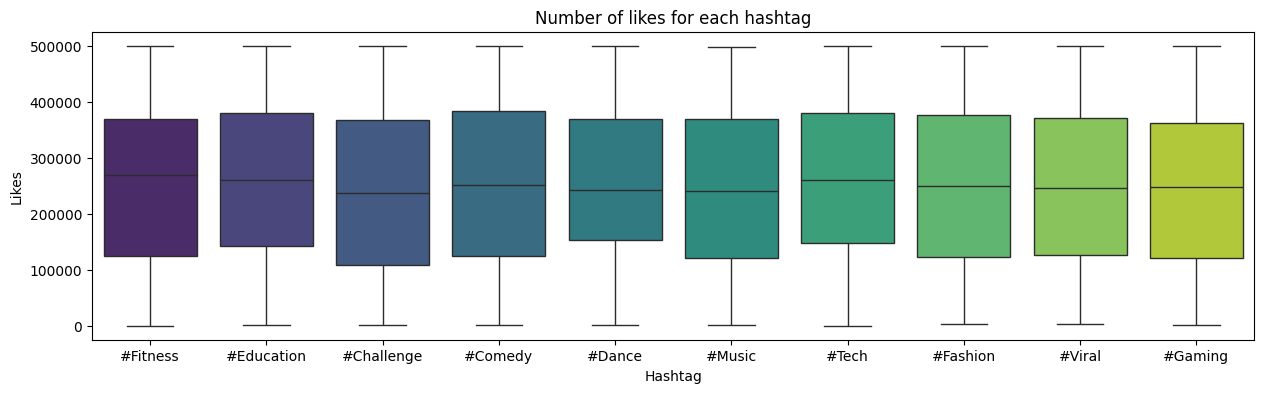

In [ ]:
## hashtag type dist
import matplotlib.pyplot as mpl
import seaborn as sns
mpl.figure(figsize=(15, 4))
sns.boxplot(data=socials, x='Hashtag', y='Likes', palette='viridis', order=socials['Hashtag'].value_counts().index) ## sns because it's from seaborn
mpl.title("Number of likes for each hashtag")
mpl.show()

## palette = colours, can be any this is just an example

<ipython-input-24-db5a36a8731a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=socials, x='Hashtag', y='Comments', palette='viridis', order=socials['Hashtag'].value_counts().index) ## sns because it's from seaborn


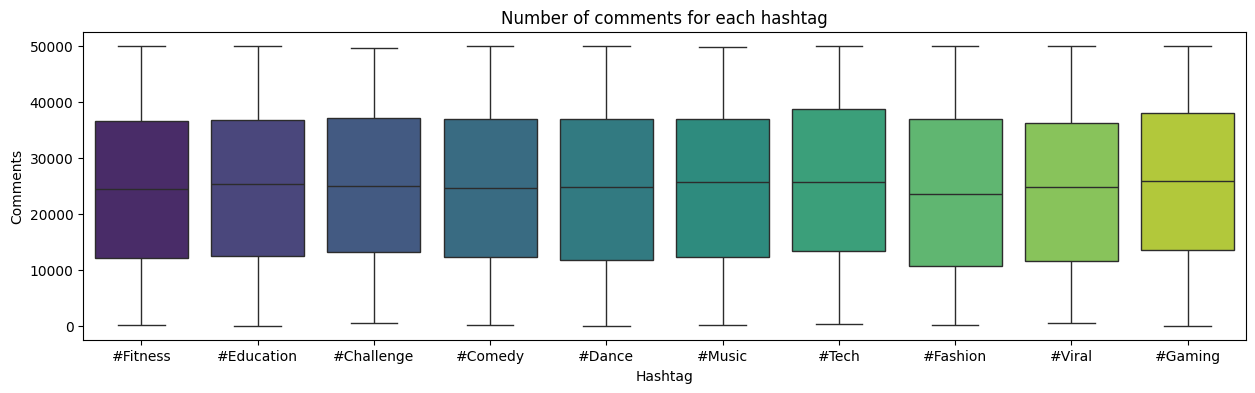

In [ ]:
import matplotlib.pyplot as mpl
import seaborn as sns
mpl.figure(figsize=(15, 4))
sns.boxplot(data=socials, x='Hashtag', y='Comments', palette='viridis', order=socials['Hashtag'].value_counts().index) ## sns because it's from seaborn
mpl.title("Number of comments for each hashtag")
mpl.show()

In [ ]:
import matplotlib.pyplot as mpl
import seaborn as sns
mpl.figure(figsize=(15, 4))
sns.boxplot(data=socials, x='Hashtag', y='Shares', palette='viridis', order=socials['Hashtag'].value_counts().index) ## sns because it's from seaborn
mpl.title("Number of shares for each hashtag")
mpl.show()

KeyError: ('Shares', 'Likes', 'Comments', 'Views')

<Figure size 1500x400 with 0 Axes>

<ipython-input-26-a1da3fdeddc8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=socials, x='Hashtag', y='Views', palette='viridis', order=socials['Hashtag'].value_counts().index) ## sns because it's from seaborn


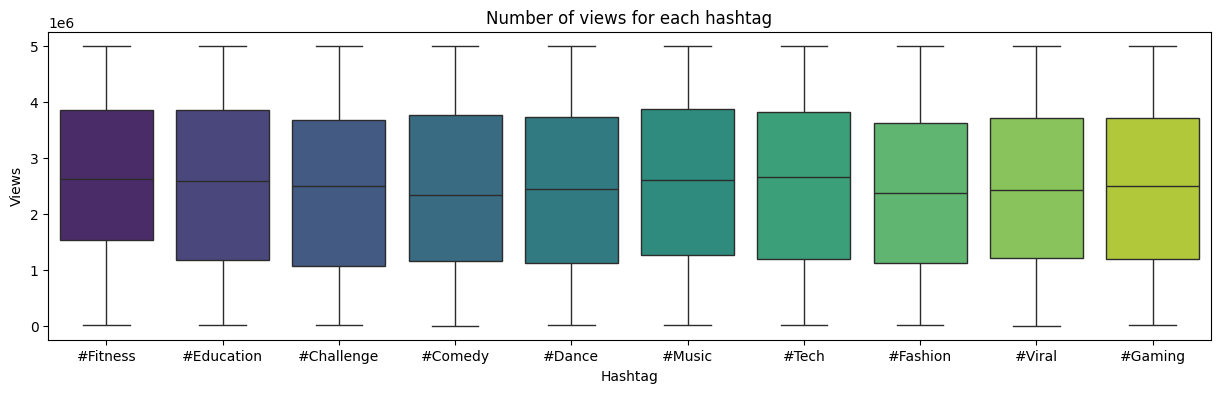

In [ ]:
import matplotlib.pyplot as mpl
import seaborn as sns
mpl.figure(figsize=(15, 4))
sns.boxplot(data=socials, x='Hashtag', y='Views', palette='viridis', order=socials['Hashtag'].value_counts().index) ## sns because it's from seaborn
mpl.title("Number of views for each hashtag")
mpl.show()

Boxplots on regions

<ipython-input-34-8f6f5009fd5a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=socials, x='Region', y='Likes', palette='magma', order=socials['Region'].value_counts().index) ## sns because it's from seaborn


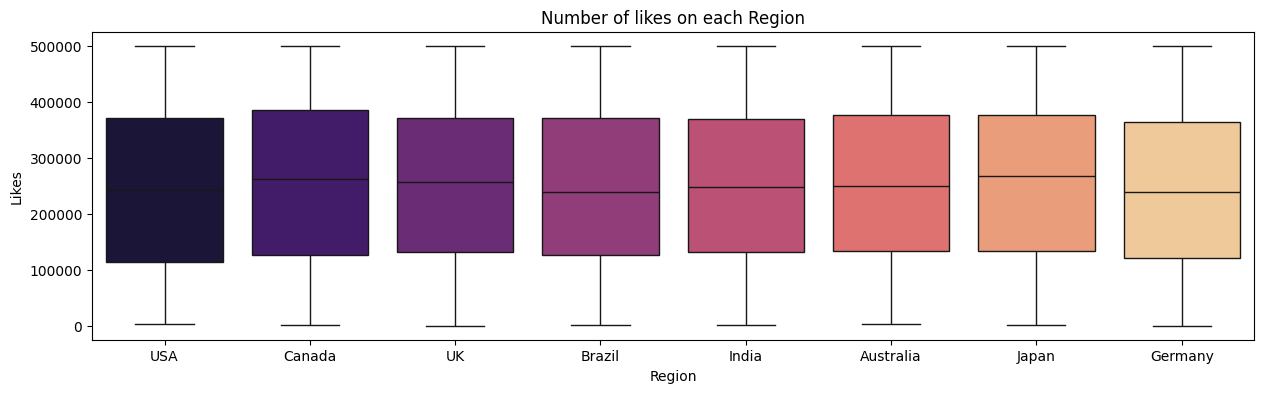

In [ ]:
import matplotlib.pyplot as mpl
import seaborn as sns
mpl.figure(figsize=(15, 4))
sns.boxplot(data=socials, x='Region', y='Likes', palette='magma', order=socials['Region'].value_counts().index) ## sns because it's from seaborn
mpl.title("Number of likes in each Region")
mpl.show()

<ipython-input-35-fdf71e49e7ac>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=socials, x='Region', y='Shares', palette='magma', order=socials['Region'].value_counts().index) ## sns because it's from seaborn


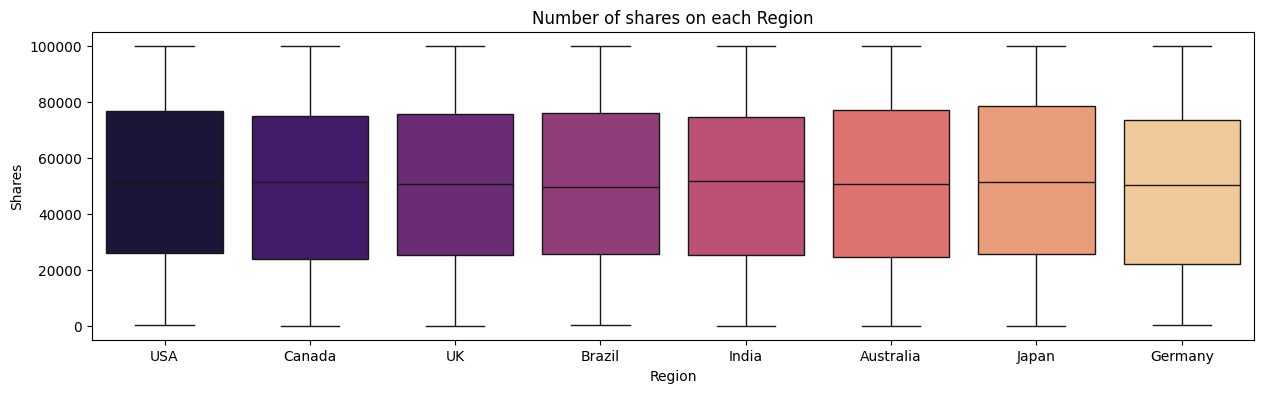

In [ ]:
import matplotlib.pyplot as mpl
import seaborn as sns
mpl.figure(figsize=(15, 4))
sns.boxplot(data=socials, x='Region', y='Shares', palette='magma', order=socials['Region'].value_counts().index) ## sns because it's from seaborn
mpl.title("Number of shares in each Region")
mpl.show()

<ipython-input-36-25890e339386>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=socials, x='Region', y='Comments', palette='magma', order=socials['Region'].value_counts().index) ## sns because it's from seaborn


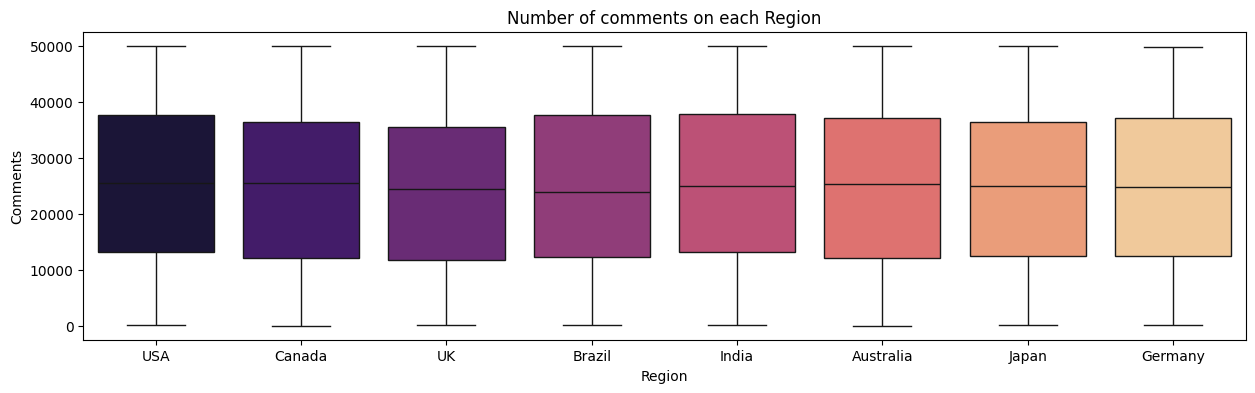

In [ ]:
import matplotlib.pyplot as mpl
import seaborn as sns
mpl.figure(figsize=(15, 4))
sns.boxplot(data=socials, x='Region', y='Comments', palette='magma', order=socials['Region'].value_counts().index) ## sns because it's from seaborn
mpl.title("Number of comments in each Region")
mpl.show()

<ipython-input-67-ee8637f85c38>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=socials, x='Region', y='Views', palette='magma', order=socials['Region'].value_counts().index) ## sns because it's from seaborn


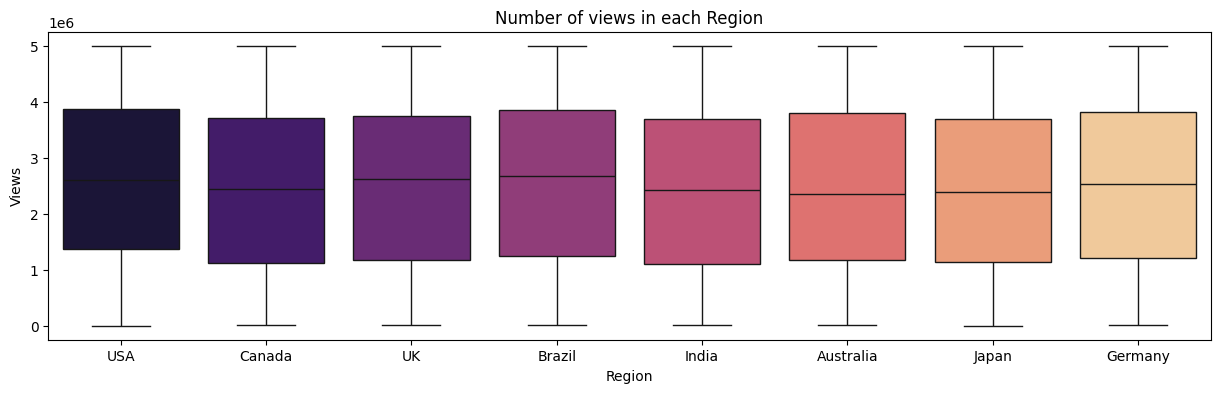

In [ ]:
import matplotlib.pyplot as mpl
import seaborn as sns
mpl.figure(figsize=(15, 4))
sns.boxplot(data=socials, x='Region', y='Views', palette='magma', order=socials['Region'].value_counts().index) ## sns because it's from seaborn
mpl.title("Number of views in each Region")
mpl.show()

Boxplots of platform engagement in regions

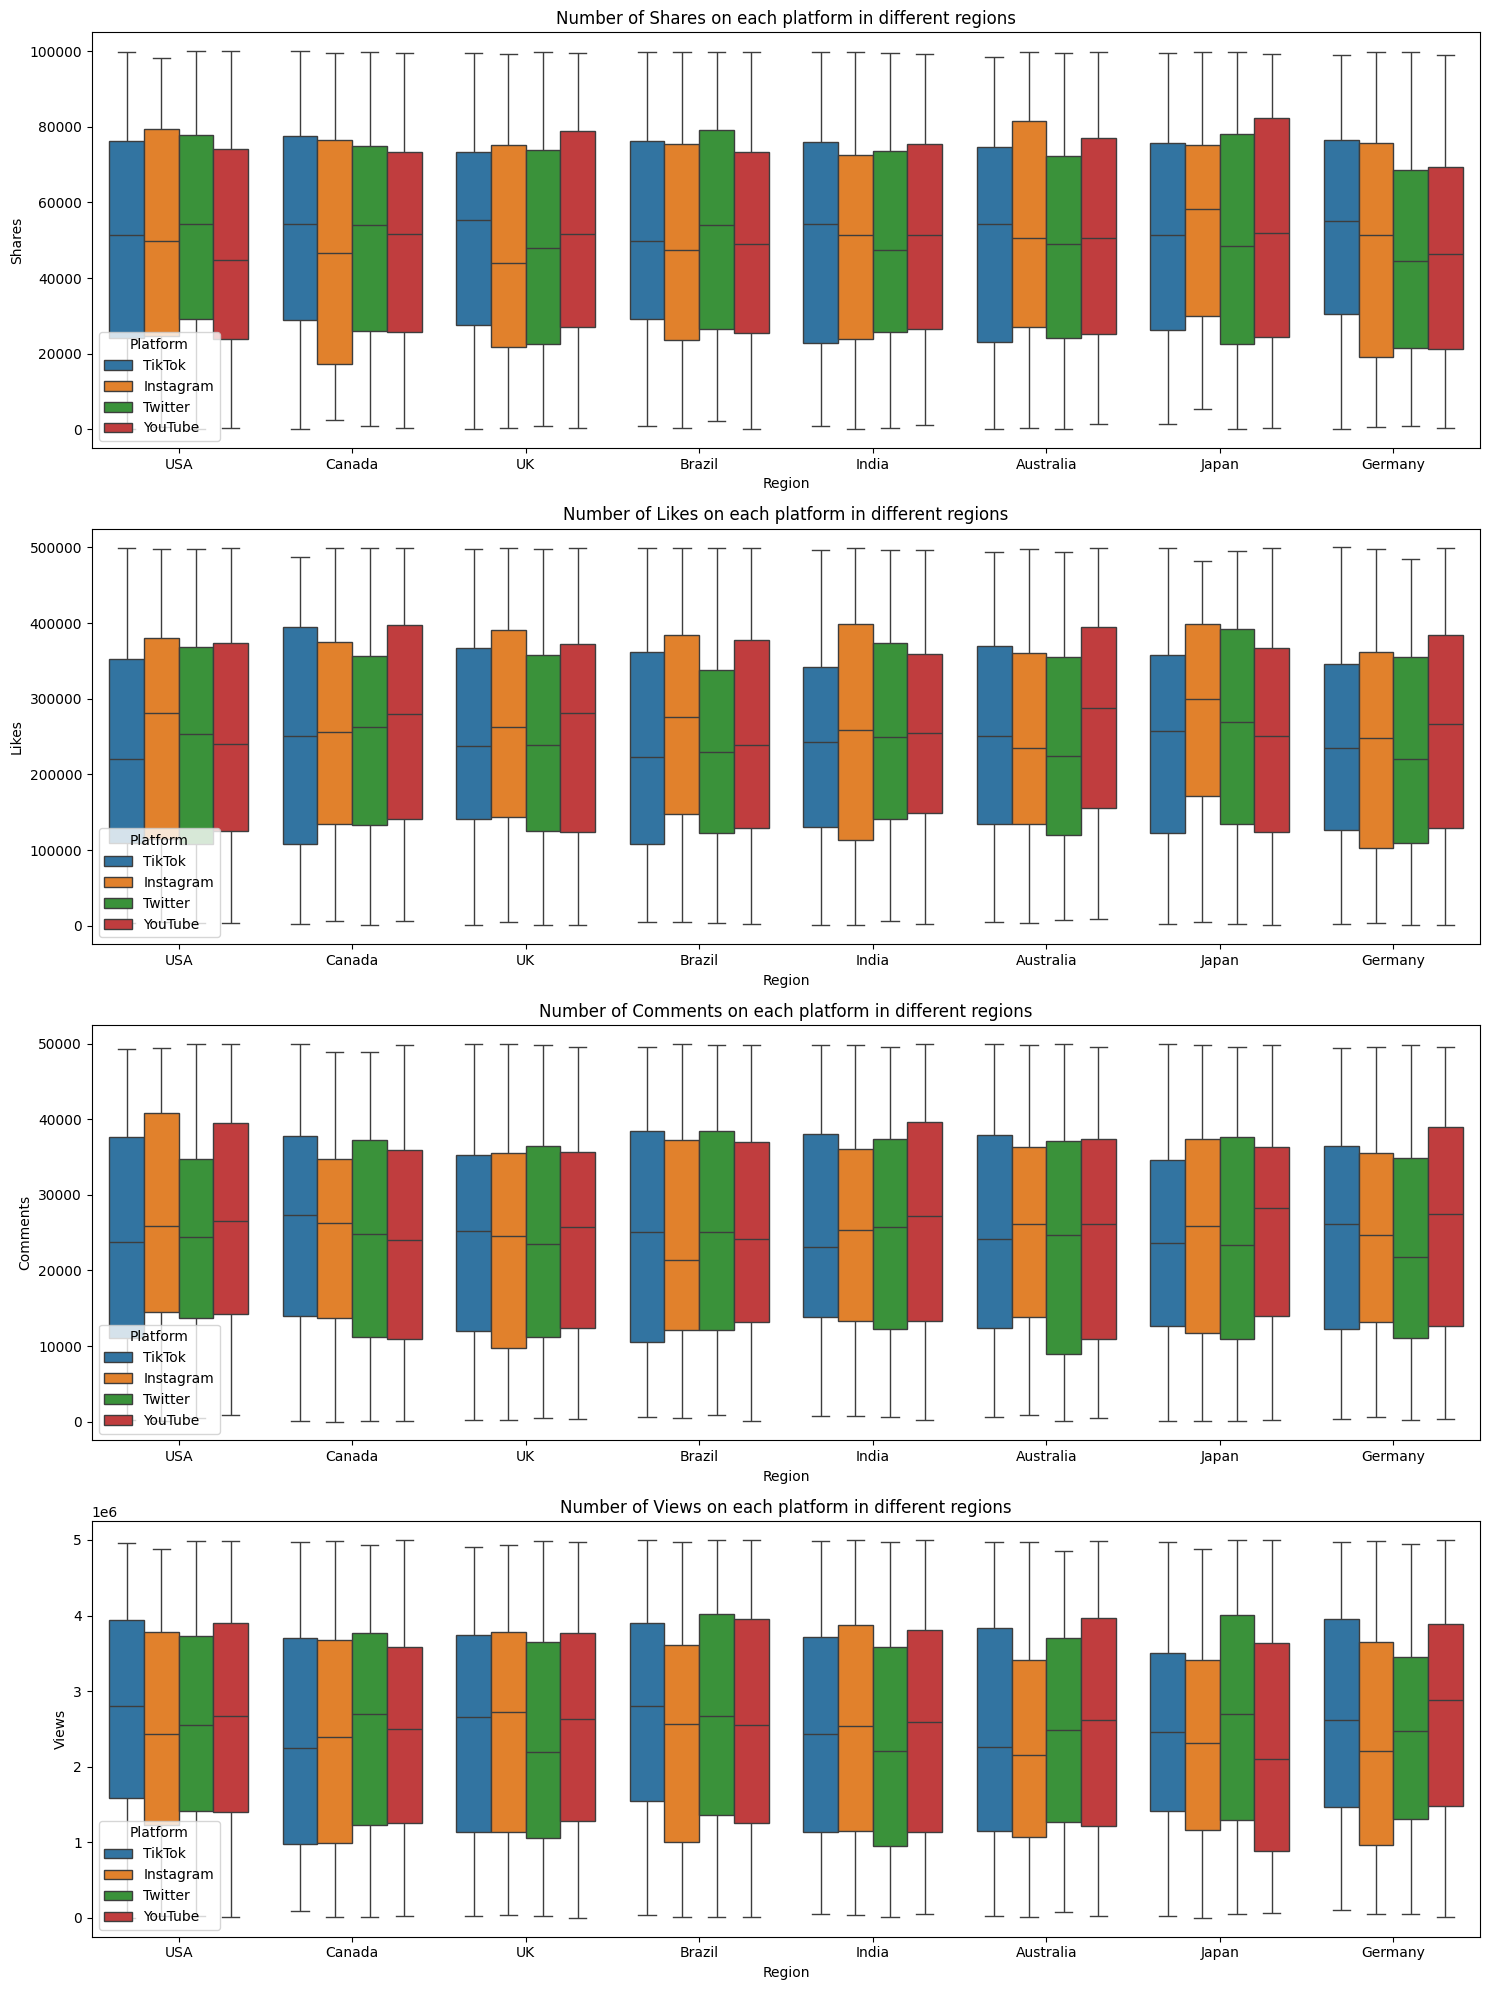

In [ ]:
import matplotlib.pyplot as mpl
import seaborn as sns
mpl.figure(figsize=(15,20))

for i, col in enumerate(['Shares', 'Likes', 'Comments', 'Views']):
    mpl.subplot(4, 1, i + 1)  # 2x2 grid, i+1 determines subplot position
    ay = sns.boxplot(data=socials, x='Region', y=col, hue='Platform', order=socials['Region'].value_counts().index)
    sns.move_legend(ay, 'lower left')
    mpl.title(f"Number of {col} on each platform in different regions")

mpl.tight_layout()  # Adjust subplot spacing
mpl.show()

Piecharts

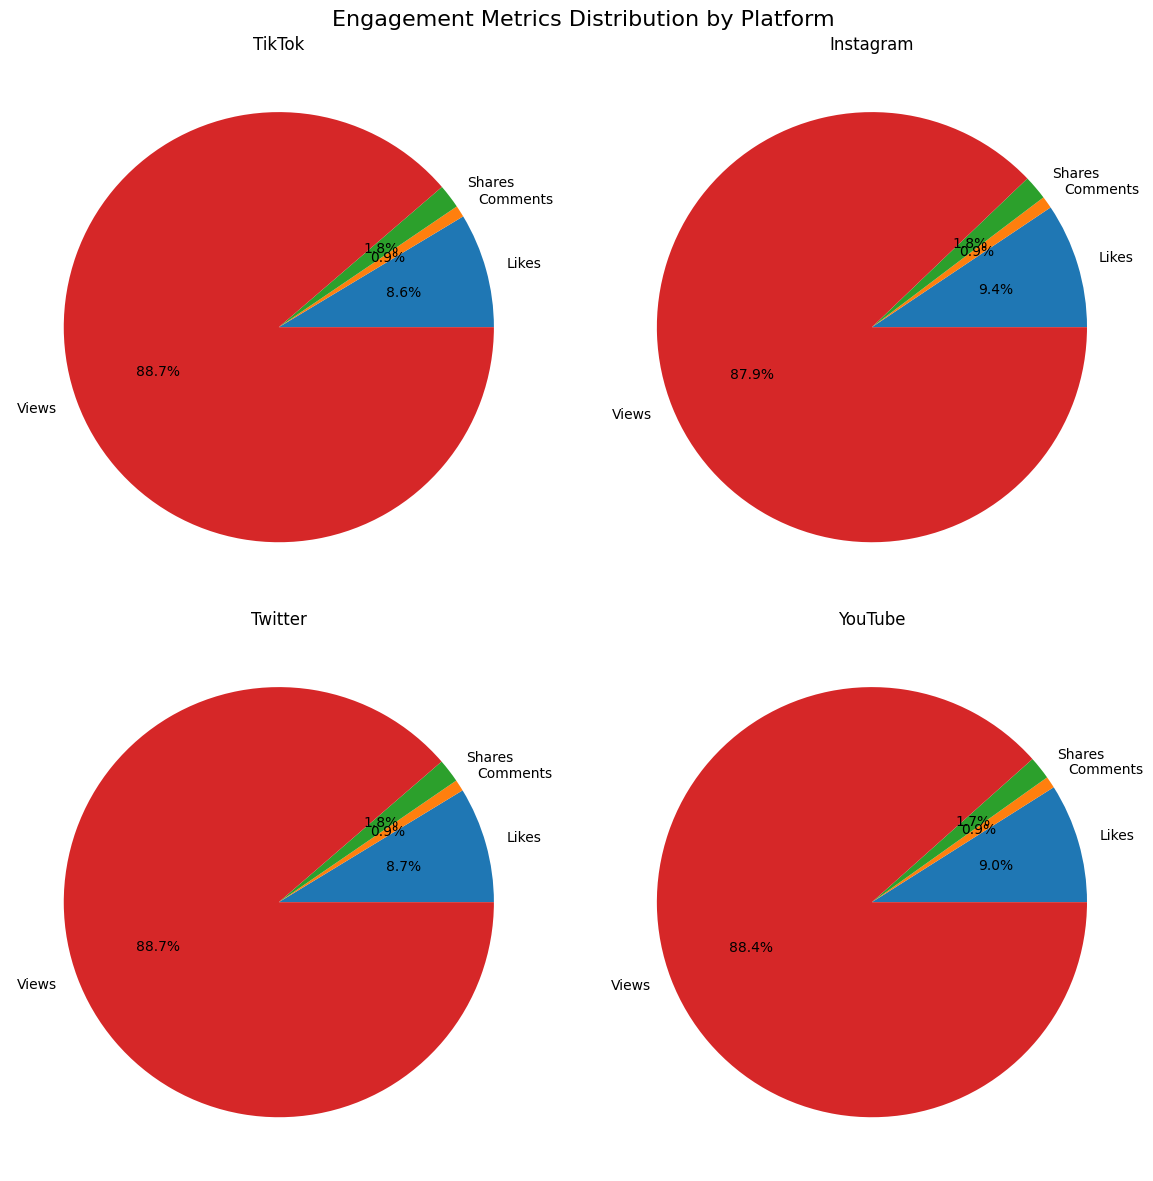

In [ ]:
import matplotlib.pyplot as mpl
import seaborn as sns
import pandas as pd

platforms = socials['Platform'].unique()  # Get unique platform names -- needed for making individual pies

fig, axes = mpl.subplots(2, 2, figsize=(12, 12))  # Create a 2x2 grid of subplots
fig.suptitle('Engagement Metrics Distribution by Platform, with views', fontsize=16)  # Set overall title

for i, platform in enumerate(platforms):
    platform_data = socials[socials['Platform'] == platform][['Likes', 'Comments', 'Shares', 'Views']].sum()
    ax = axes[i // 2, i % 2]  # Select the appropriate subplot
    ax.pie(x=platform_data, labels=platform_data.index, autopct='%1.1f%%',explode = [0.01,0.01,0.3,0.01])
    ax.set_title(platform)  # Set subplot title

mpl.tight_layout()  # Adjust spacing
mpl.show()


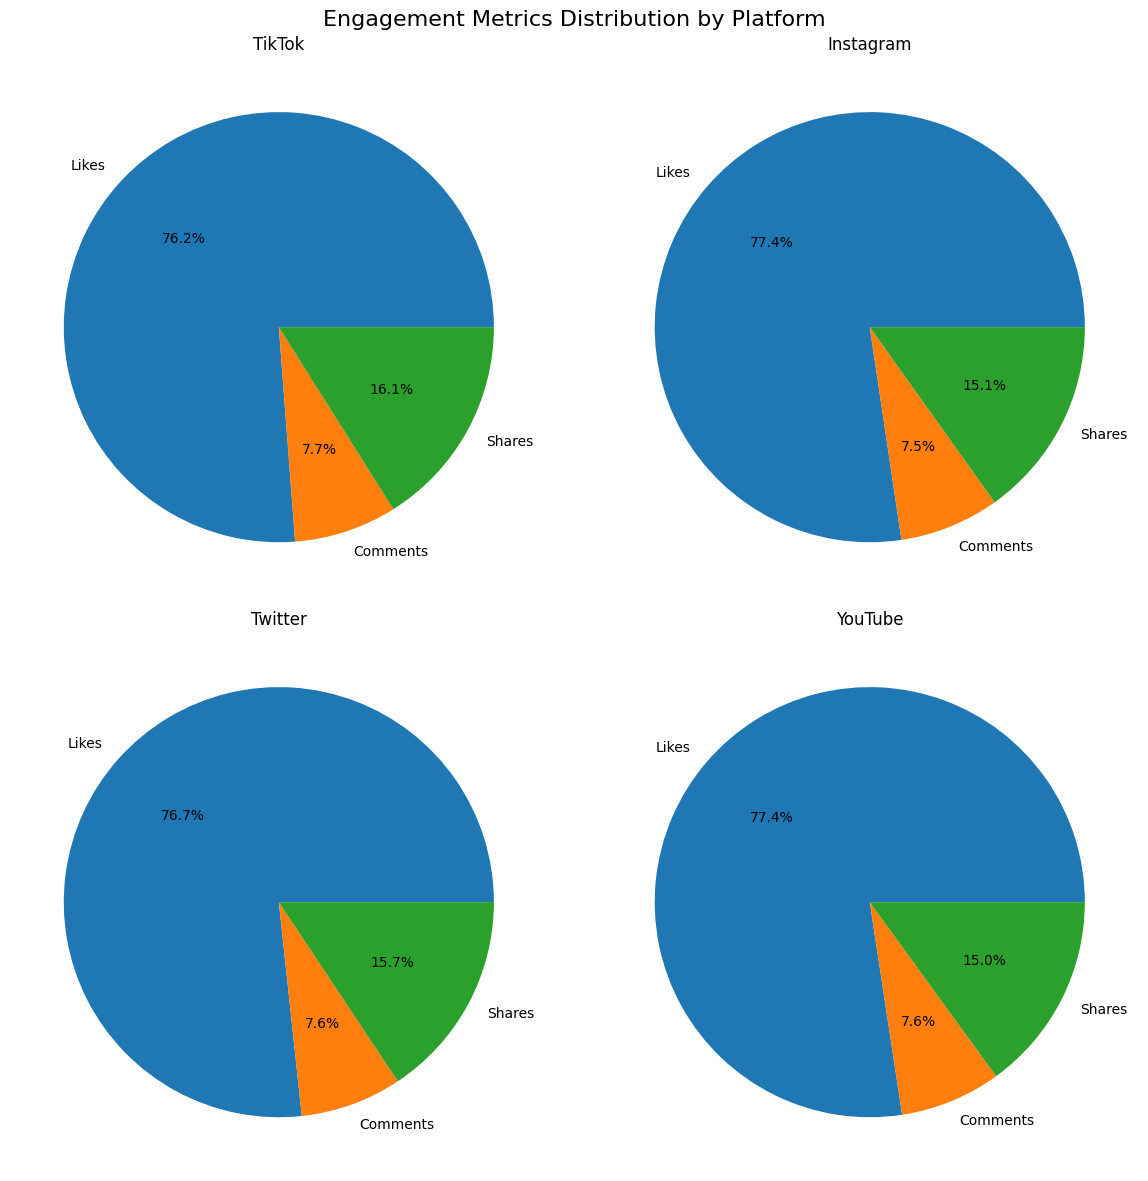

In [ ]:
## let's removes views to see the post-view interactions
import matplotlib.pyplot as mpl
import seaborn as sns
import pandas as pd

platforms = socials['Platform'].unique()  # Get unique platform names -- needed for making individual pies

fig, axes = mpl.subplots(2, 2, figsize=(12, 12))  # Create a 2x2 grid of subplots
fig.suptitle('Engagement Metrics Distribution by Platform, without views', fontsize=16)  # Set overall title

for i, platform in enumerate(platforms):
    platform_data = socials[socials['Platform'] == platform][['Likes', 'Comments', 'Shares']].sum()
    ax = axes[i // 2, i % 2]  # Select the appropriate subplot
    ax.pie(x=platform_data, labels=platform_data.index, autopct='%1.1f%%',explode = [0.01,0.01,0.01])
    ax.set_title(platform)  # Set subplot title

mpl.tight_layout()  # Adjust spacing
mpl.show()

### everything is roughly the same so can't say that platforms are interacted with differently

hashtag piecharts to see if the engagement is different there

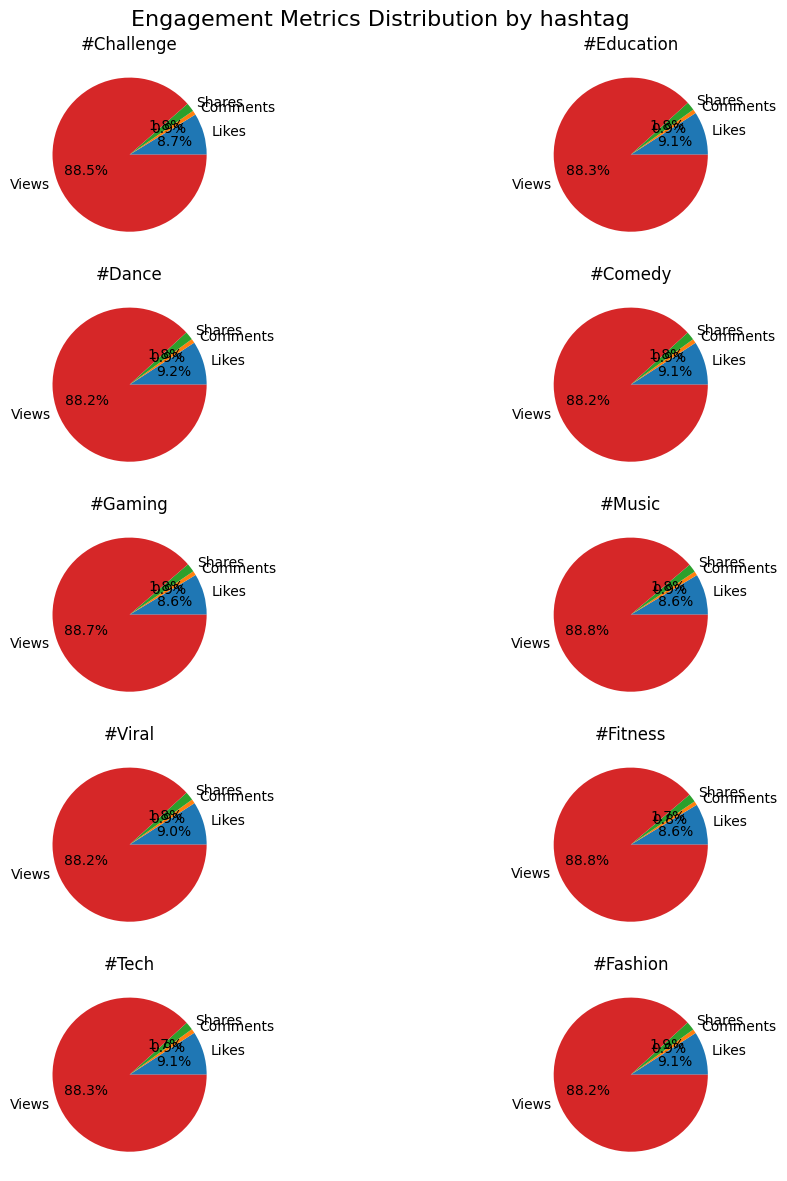

In [ ]:
import matplotlib.pyplot as mpl
import seaborn as sns
import pandas as pd

hashtags = socials['Hashtag'].unique()  # Get unique platform names -- needed for making individual pies

fig, axes = mpl.subplots(5, 2, figsize=(12, 12))  # Create a 2x2 grid of subplots
fig.suptitle('Engagement Metrics Distribution by hashtag, with views', fontsize=16)  # Set overall title

for i, hashtag in enumerate(hashtags):
    hashtag_data = socials[socials['Hashtag'] == hashtag][['Likes', 'Comments', 'Shares', 'Views']].sum()
    ax = axes[i // 2, i % 2]  # Select the appropriate subplot
    ax.pie(x=hashtag_data, labels=hashtag_data.index, autopct='%1.1f%%',explode = [0.01,0.01,0.3,0.01])
    ax.set_title(hashtag)  # Set subplot title

mpl.tight_layout()  # Adjust spacing
mpl.show()

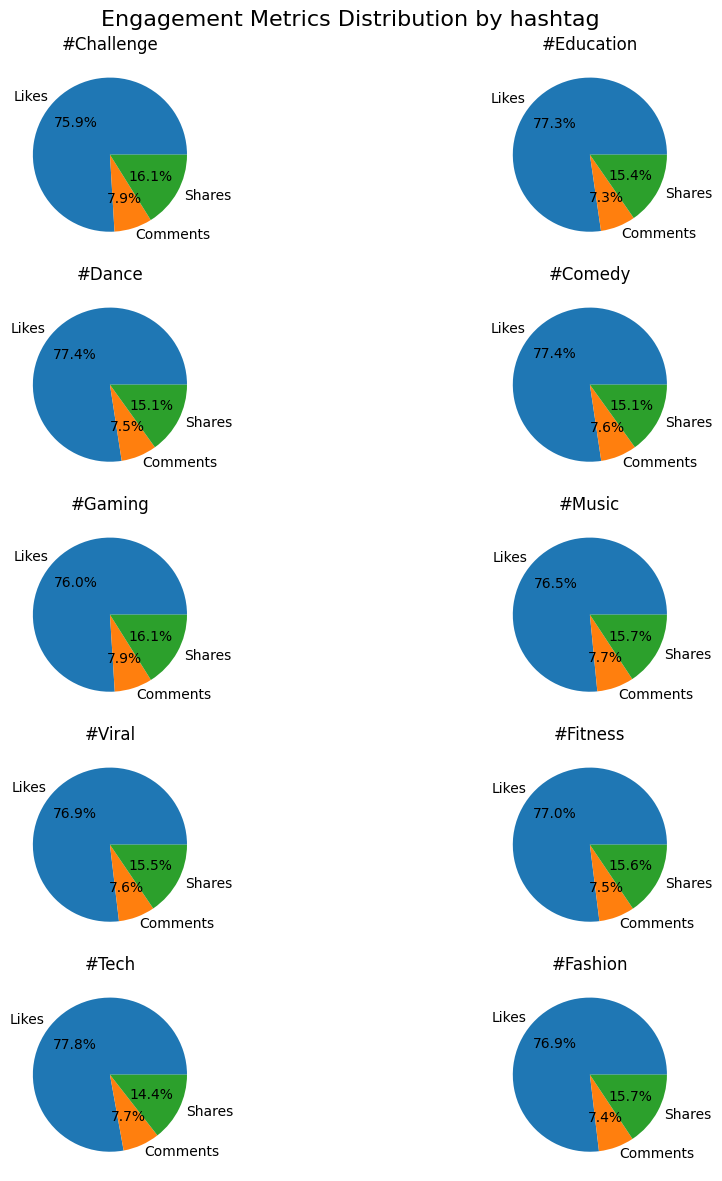

In [ ]:
## wihtout views

import matplotlib.pyplot as mpl
import seaborn as sns
import pandas as pd

hashtags = socials['Hashtag'].unique()  # Get unique platform names -- needed for making individual pies

fig, axes = mpl.subplots(5, 2, figsize=(12, 12))  # Create a 2x2 grid of subplots
fig.suptitle('Engagement Metrics Distribution by hashtag, without views', fontsize=16)  # Set overall title

for i, hashtag in enumerate(hashtags):
    hashtag_data = socials[socials['Hashtag'] == hashtag][['Likes', 'Comments', 'Shares']].sum()
    ax = axes[i // 2, i % 2]  # Select the appropriate subplot
    ax.pie(x=hashtag_data, labels=hashtag_data.index, autopct='%1.1f%%',explode = [0.01,0.01,0.01,0.01])
    ax.set_title(hashtag)  # Set subplot title

mpl.tight_layout()  # Adjust spacing
mpl.show()

Does interaction vary with region?

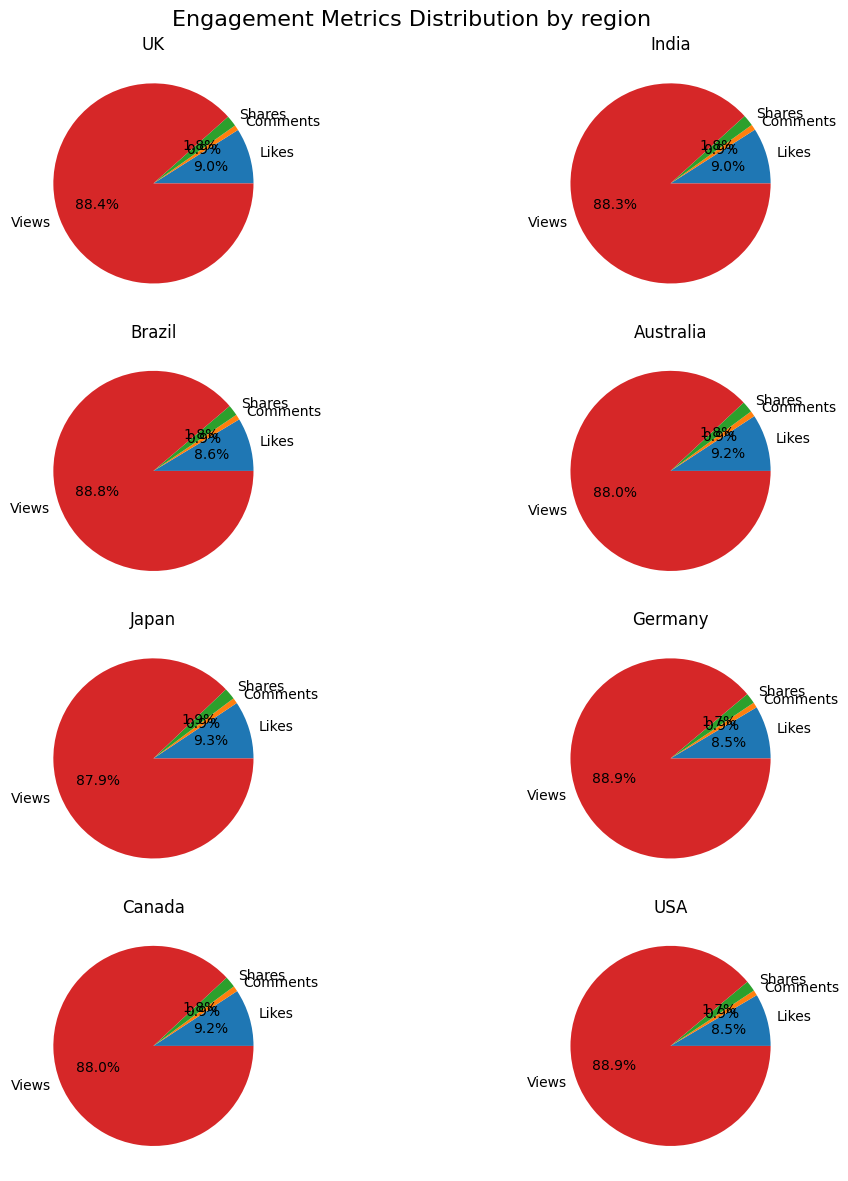

In [ ]:
import matplotlib.pyplot as mpl
import seaborn as sns
import pandas as pd

regions = socials['Region'].unique()  # Get unique platform names -- needed for making individual pies

fig, axes = mpl.subplots(4, 2, figsize=(12, 12))  # Create a 2x2 grid of subplots
fig.suptitle('Engagement Metrics Distribution by region, with views', fontsize=16)  # Set overall title

for i, region in enumerate(regions):
    region_data = socials[socials['Region'] == region][['Likes', 'Comments', 'Shares', 'Views']].sum()
    ax = axes[i // 2, i % 2]  # Select the appropriate subplot
    ax.pie(x=region_data, labels=region_data.index, autopct='%1.1f%%',explode = [0.01,0.01,0.3,0.01])
    ax.set_title(region)  # Set subplot title

mpl.tight_layout()  # Adjust spacing
mpl.show()

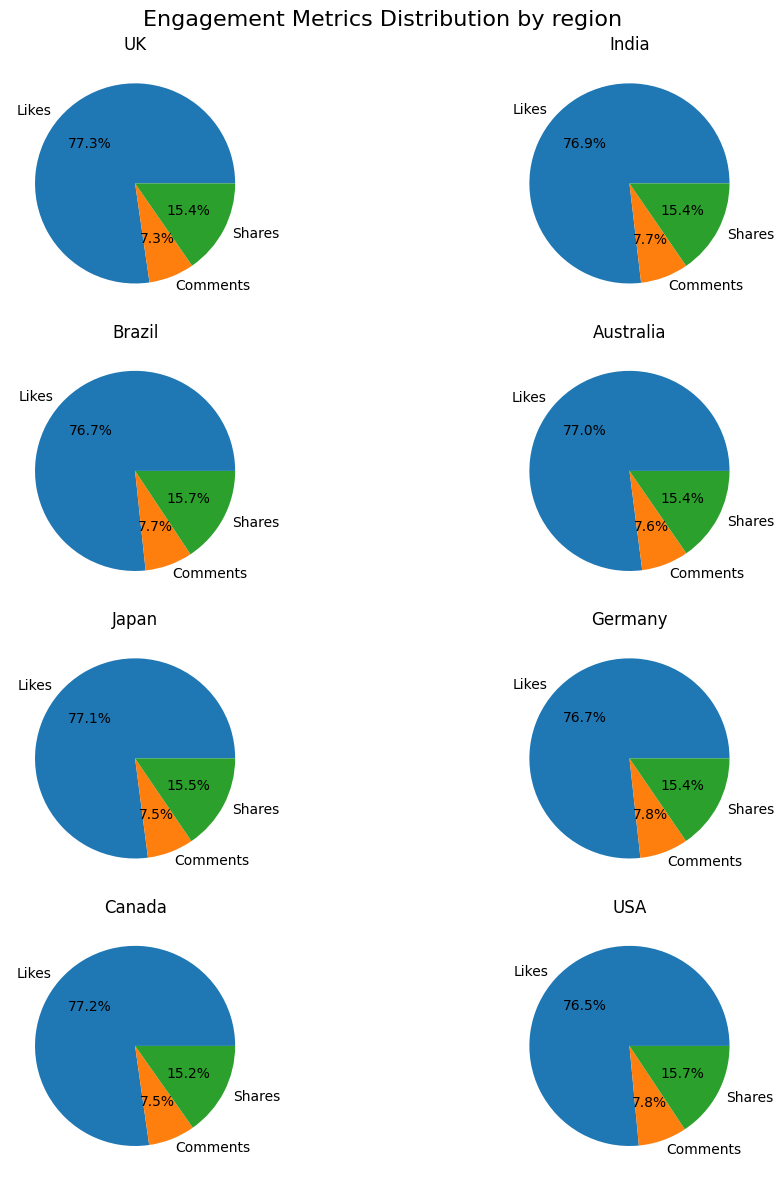

In [ ]:
## disregarding views

import matplotlib.pyplot as mpl
import seaborn as sns
import pandas as pd

regions = socials['Region'].unique()  # Get unique platform names -- needed for making individual pies

fig, axes = mpl.subplots(4, 2, figsize=(12, 12))  # Create a 2x2 grid of subplots
fig.suptitle('Engagement Metrics Distribution by region, without views', fontsize=16)  # Set overall title

for i, region in enumerate(regions):
    region_data = socials[socials['Region'] == region][['Likes', 'Comments', 'Shares']].sum()
    ax = axes[i // 2, i % 2]  # Select the appropriate subplot
    ax.pie(x=region_data, labels=region_data.index, autopct='%1.1f%%',explode = [0.01,0.01,0.01])
    ax.set_title(region)  # Set subplot title

mpl.tight_layout()  # Adjust spacing
mpl.show()

Platform usage in different regions - do different regions have different platform preferences

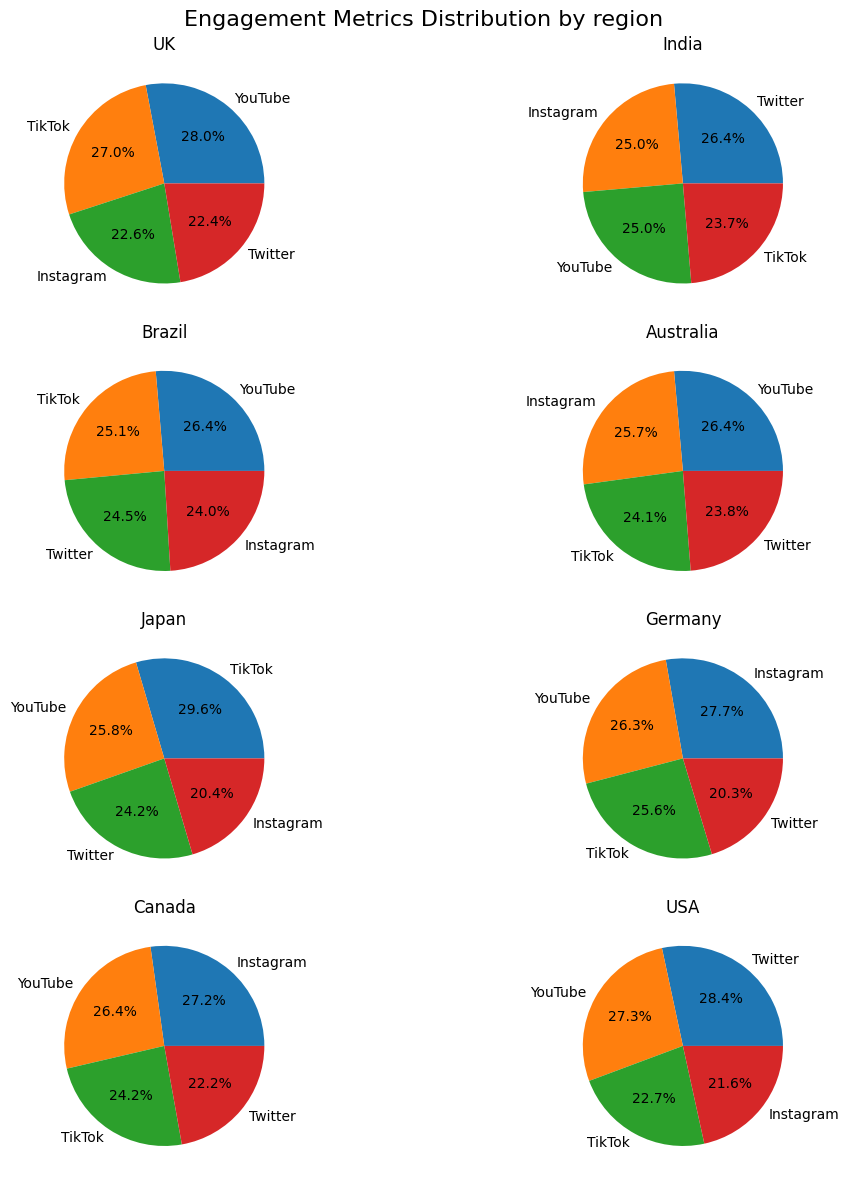

In [ ]:
import matplotlib.pyplot as mpl
import seaborn as sns
import pandas as pd

regions = socials['Region'].unique()  # Get unique platform names -- needed for making individual pies

fig, axes = mpl.subplots(4, 2, figsize=(12, 12))  # Create a 2x2 grid of subplots
fig.suptitle('Engagement Metrics Distribution by region', fontsize=16)  # Set overall title

for i, region in enumerate(regions):
    region_data = socials[socials['Region'] == region]['Platform'].value_counts() ## value_counts count the number of each different value in the common
    ax = axes[i // 2, i % 2]  # Select the appropriate subplot
    ax.pie(x=region_data, labels=region_data.index, autopct='%1.1f%%',explode = [0.01,0.01,0.01,0.01])
    ax.set_title(region)  # Set subplot title

mpl.tight_layout()  # Adjust spacing
mpl.show()

Are different hashtags more popular in different regions?

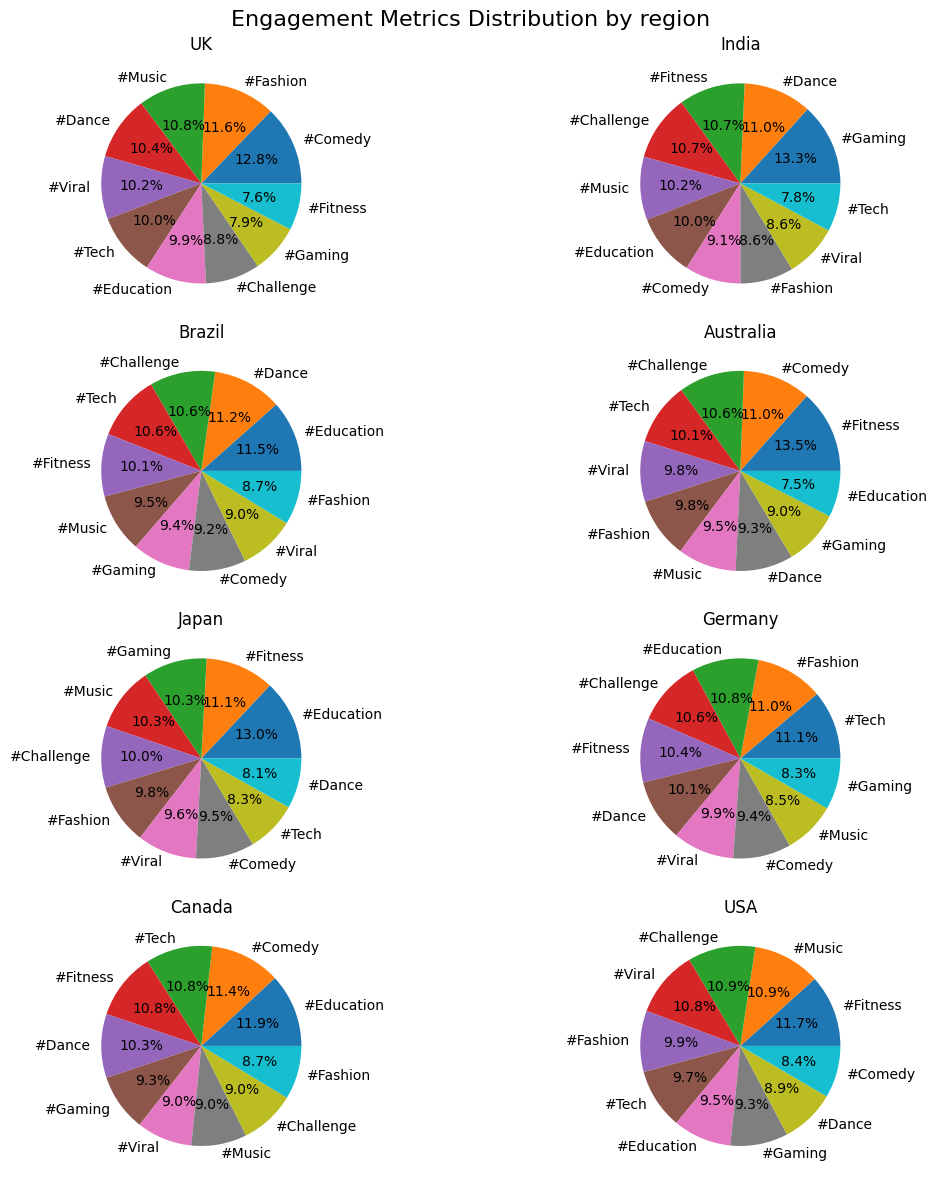

In [ ]:
import matplotlib.pyplot as mpl
import seaborn as sns
import pandas as pd

regions = socials['Region'].unique()  # Get unique platform names -- needed for making individual pies

fig, axes = mpl.subplots(4, 2, figsize=(12, 12))  # Create a 2x2 grid of subplots
fig.suptitle('Engagement Metrics Distribution by region', fontsize=16)  # Set overall title

for i, region in enumerate(regions):
    region_data = socials[socials['Region'] == region]['Hashtag'].value_counts() ## value_counts count the number of each different value in the common
    ax = axes[i // 2, i % 2]  # Select the appropriate subplot
    ax.pie(x=region_data, labels=region_data.index, autopct='%1.1f%%',explode = [0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01])
    ax.set_title(region)  # Set subplot title

mpl.tight_layout()  # Adjust spacing
mpl.show()

Looking at engagement level in more detail

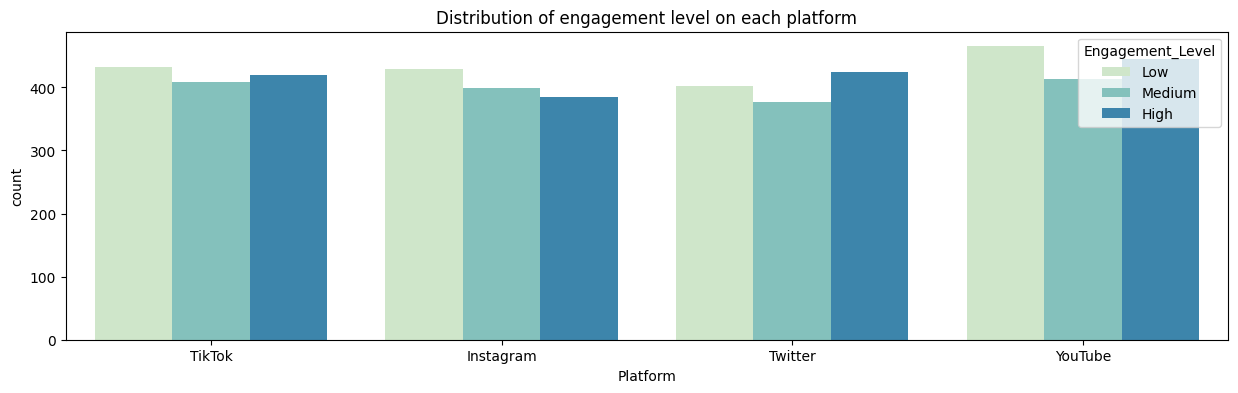

In [ ]:
import matplotlib.pyplot as mpl
import seaborn as sns

mpl.figure(figsize=(15,4))
sns.countplot(data=socials,x='Platform',hue='Engagement_Level',hue_order=['Low', 'Medium', 'High'],palette='GnBu')
mpl.title("Distribution of engagement level on each platform")
mpl.show()

### twitter is the only one where high engagement is the most common

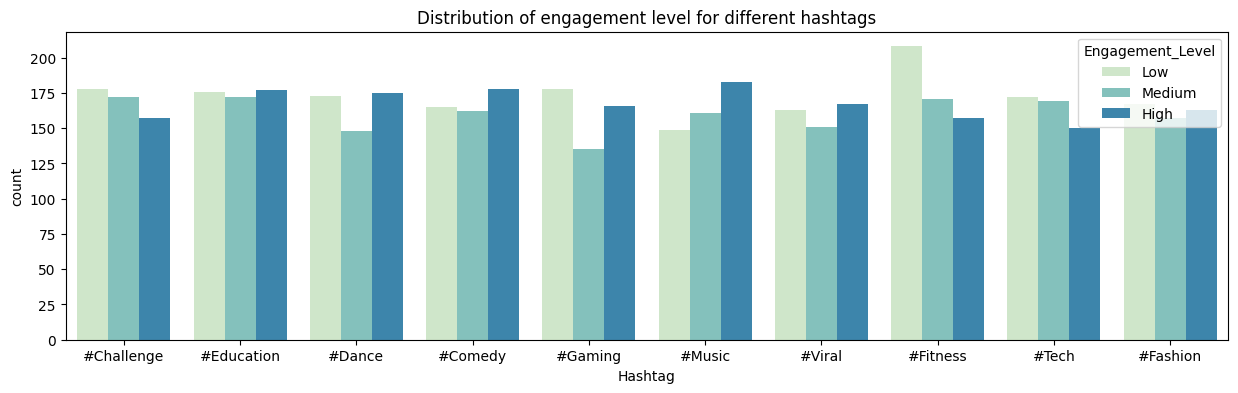

In [ ]:
import matplotlib.pyplot as mpl
import seaborn as sns

mpl.figure(figsize=(15,4))
ab = sns.countplot(data=socials,x='Hashtag',hue='Engagement_Level',hue_order=['Low', 'Medium', 'High'],palette='GnBu')
mpl.title("Distribution of engagement level for different hashtags")
sns.move_legend(ab,'upper right')
mpl.show()

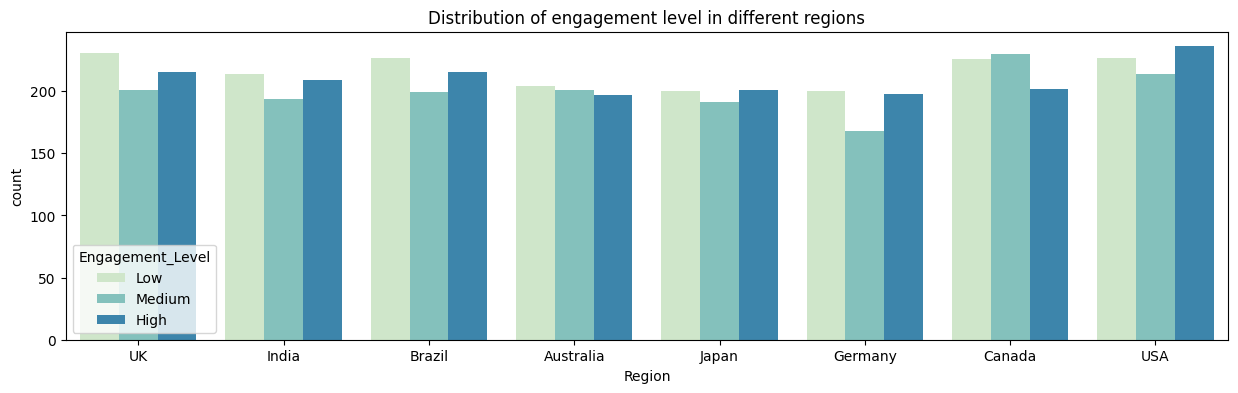

In [ ]:
import matplotlib.pyplot as mpl
import seaborn as sns

mpl.figure(figsize=(15,4))
ac = sns.countplot(data=socials,x='Region',hue='Engagement_Level',hue_order=['Low', 'Medium', 'High'],palette='GnBu')
sns.move_legend(ac,'lower left')
mpl.title("Distribution of engagement level in different regions")
mpl.show()

## USA and Japan are the only two with high engagement

In [14]:
engagement = socials['Engagement_Level'].unique()

e_likes = socials.groupby('Engagement_Level')['Likes'].sum()
e_comms = socials.groupby('Engagement_Level')['Comments'].sum()
e_shares = socials.groupby('Engagement_Level')['Shares'].sum()
e_views = socials.groupby('Engagement_Level')['Views'].sum()

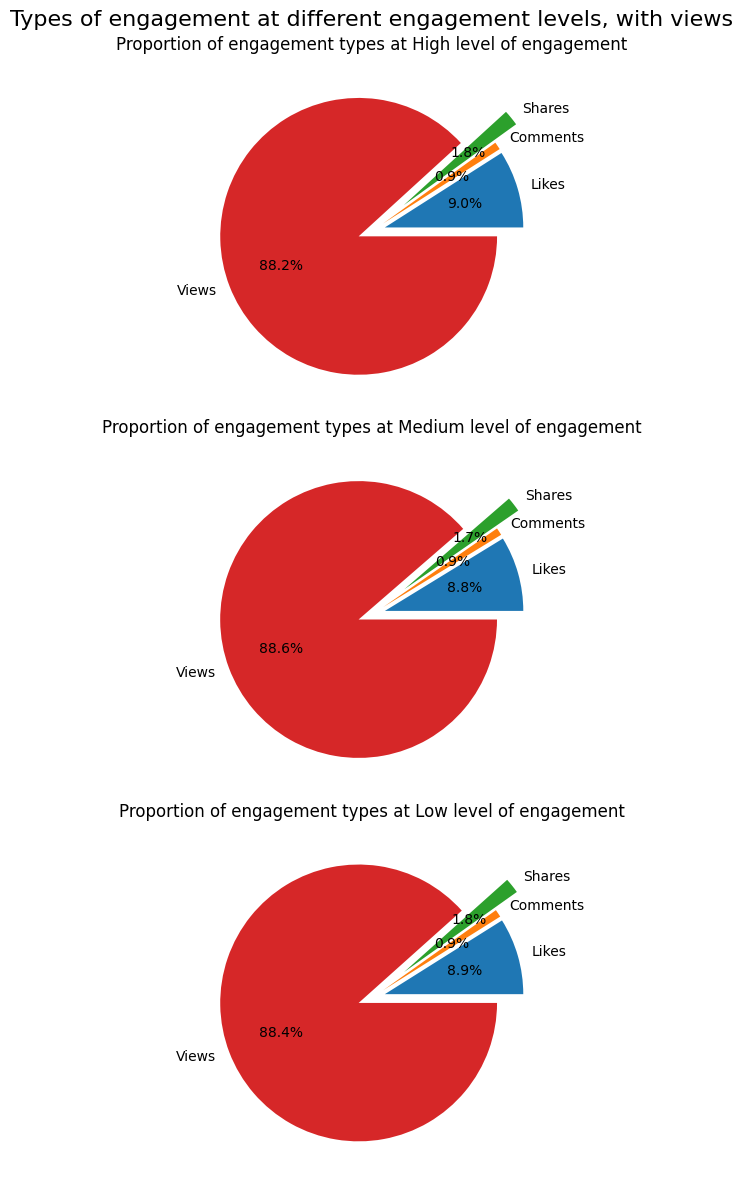

In [58]:
import matplotlib.pyplot as mpl
import seaborn as sns
import pandas as pd

engagement = socials['Engagement_Level'].unique()

e_types = [e_likes, e_comms, e_shares, e_views]

fig, axes = mpl.subplots(3, 1, figsize=(15, 12))  # Create a 2x2 grid of subplots, increased figsize for better visualization
fig.suptitle('Types of engagement at different engagement levels, with views', fontsize=16)  # Set overall title

# Use enumerate to get both index and value during iteration
for i, engagement_level in enumerate(engagement):
    # Select data for the current engagement level using .loc[]
    e_data = pd.concat(e_types).loc[engagement_level]
    ax = axes[i]
    ax.pie(x=e_data, labels=['Likes','Comments','Shares','Views'], autopct='%1.1f%%',explode = [0.01,0.01,0.3,0.01])
    ax.set_title(f"Proportion of engagement types at {engagement_level} level of engagement")
mpl.tight_layout()
mpl.show()

What content type works best?

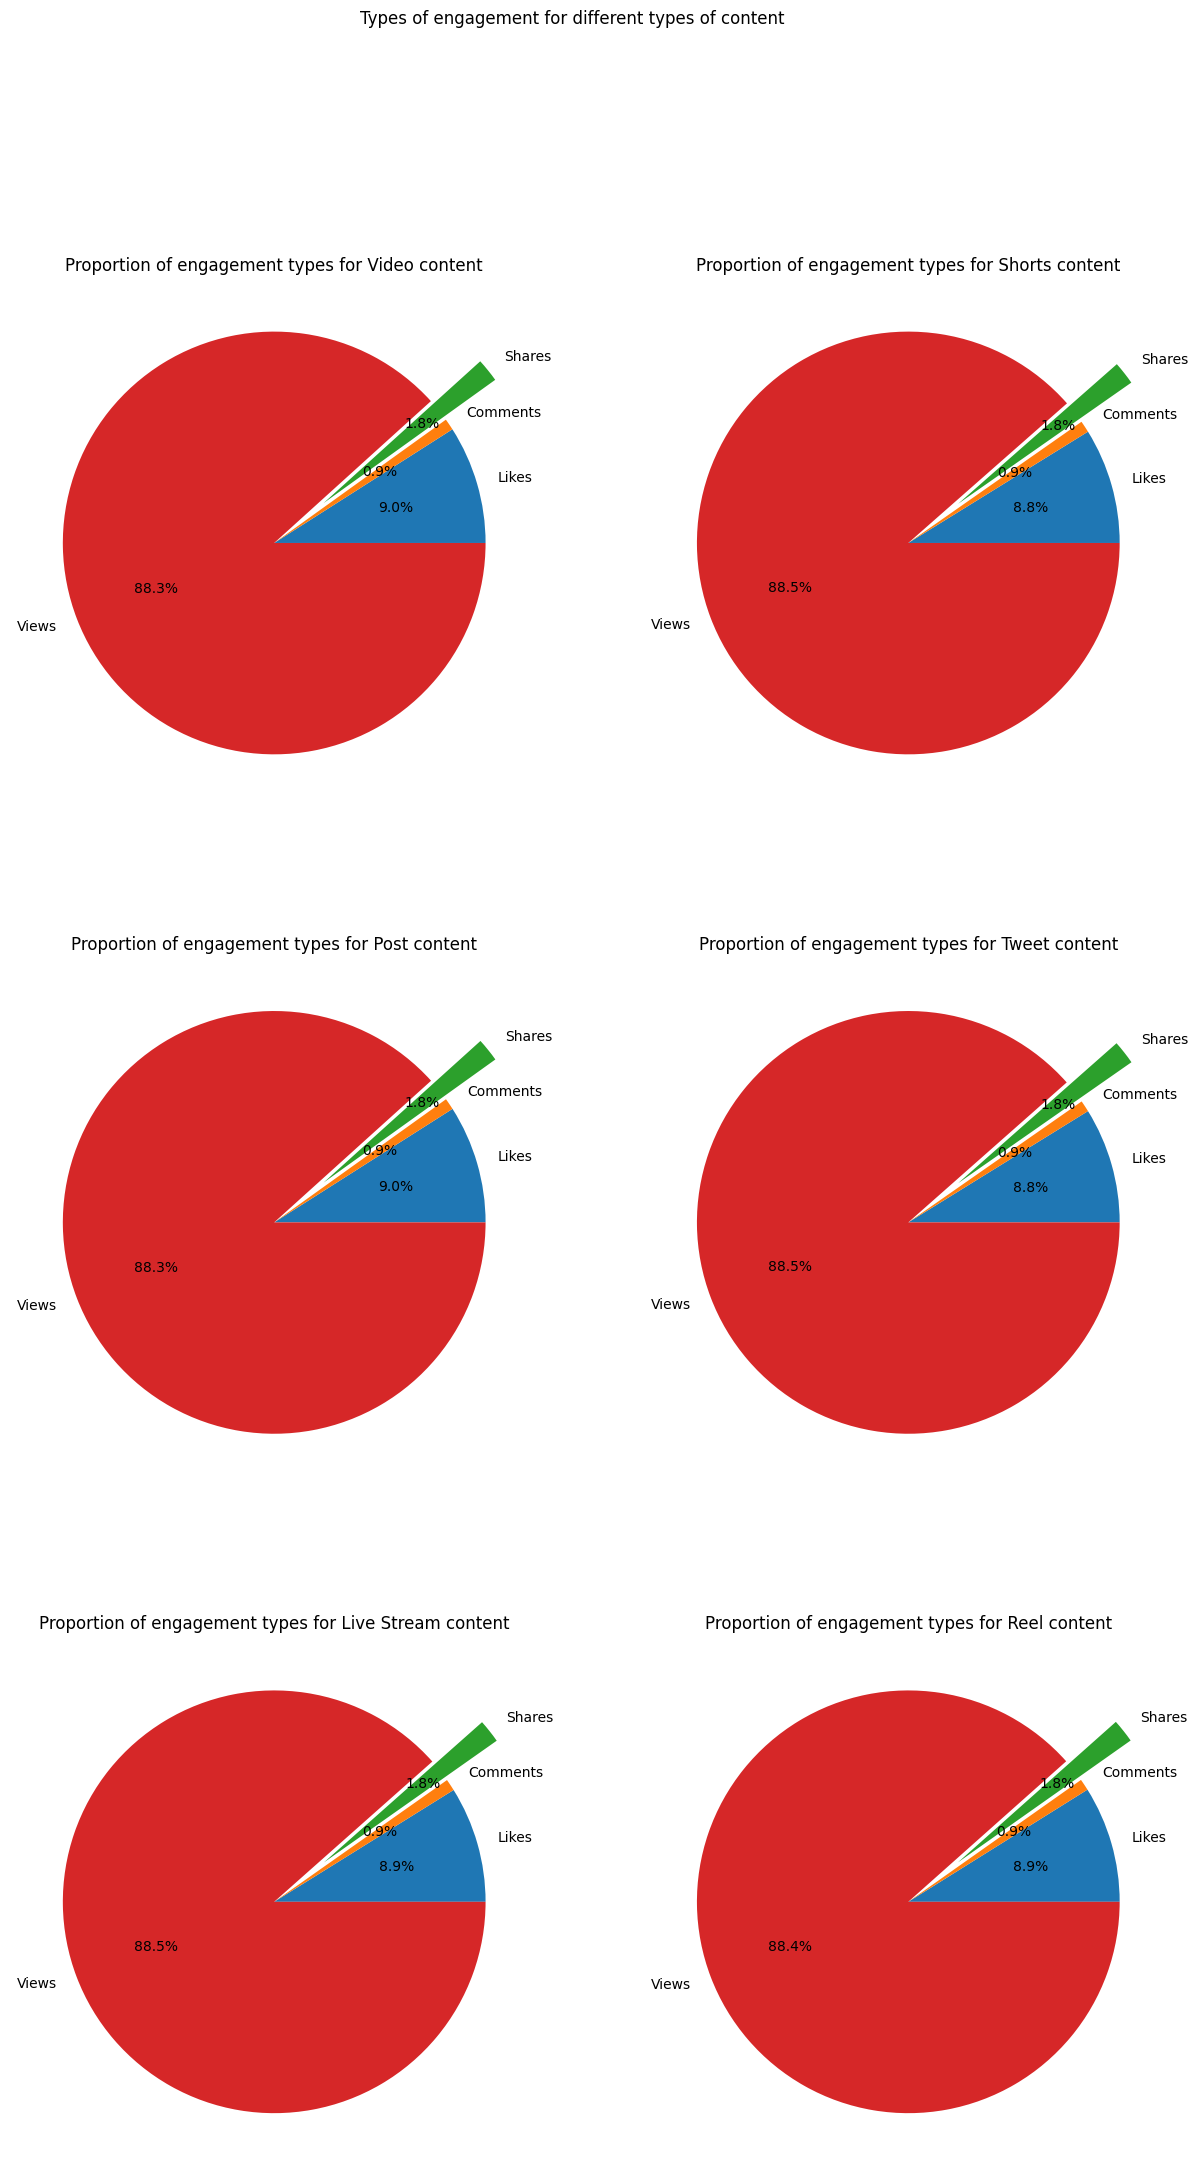

In [48]:
import matplotlib.pyplot as mpl
import seaborn as sns
import pandas as pd

contents = socials['Content_Type'].unique()

c_likes = socials.groupby('Content_Type')['Likes'].sum()
c_comms = socials.groupby('Content_Type')['Comments'].sum()
c_shares = socials.groupby('Content_Type')['Shares'].sum()
c_views = socials.groupby('Content_Type')['Views'].sum()

c_types = [c_likes,c_comms,c_shares,c_views]

fig, axes = mpl.subplots(3, 2, figsize=(15, 25))
fig.suptitle('Types of engagement for different types of content')

for i, content in enumerate(contents):
    c_data = pd.concat(c_types).loc[content]
    ad = axes[i//2, i%2] ## shows how many plots per row
    ad.pie(x=c_data, labels=['Likes','Comments','Shares','Views'], autopct='%1.1f%%',explode = [0.01,0.01,0.3,0.01])
    ad.set_title(f"Proportion of engagement types for {content} content")
mpl.tight_layout()
mpl.show()

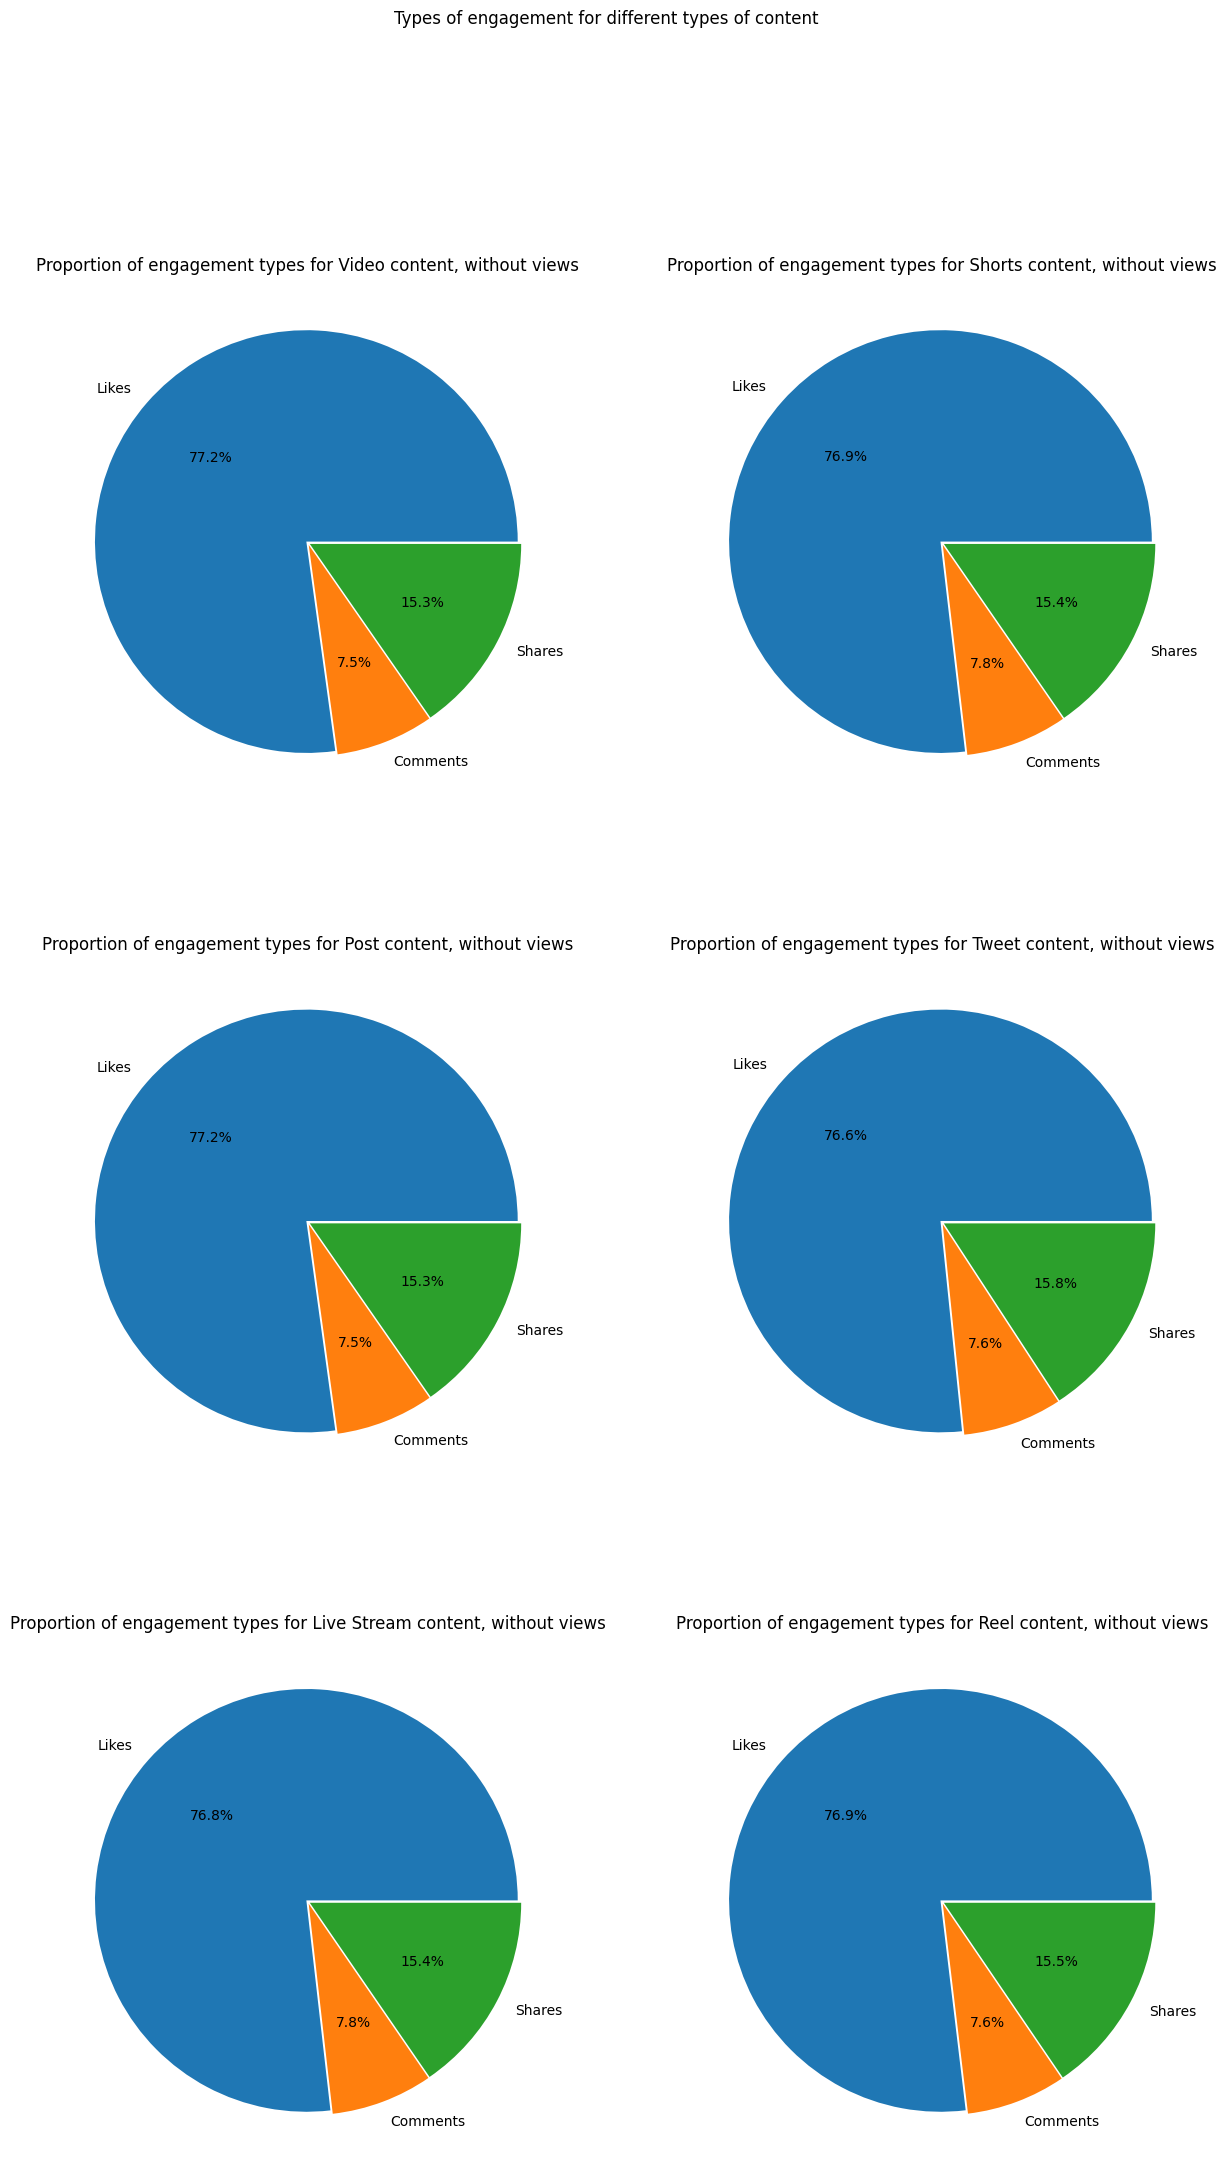

In [57]:
## without views

import matplotlib.pyplot as mpl
import seaborn as sns
import pandas as pd

contents = socials['Content_Type'].unique()

c_types_2 = [c_likes,c_comms,c_shares]

fig, axes = mpl.subplots(3, 2, figsize=(15, 25))
fig.suptitle('Types of engagement for different types of content')

for i, content in enumerate(contents):
    c_data = pd.concat(c_types_2).loc[content]
    ad = axes[i//2, i%2] ## shows how many plots per row
    ad.pie(x=c_data, labels=['Likes','Comments','Shares'], autopct='%1.1f%%',explode = [0.01,0.01,0.01])
    ad.set_title(f"Proportion of engagement types for {content} content, without views")
mpl.tight_layout()
mpl.show()

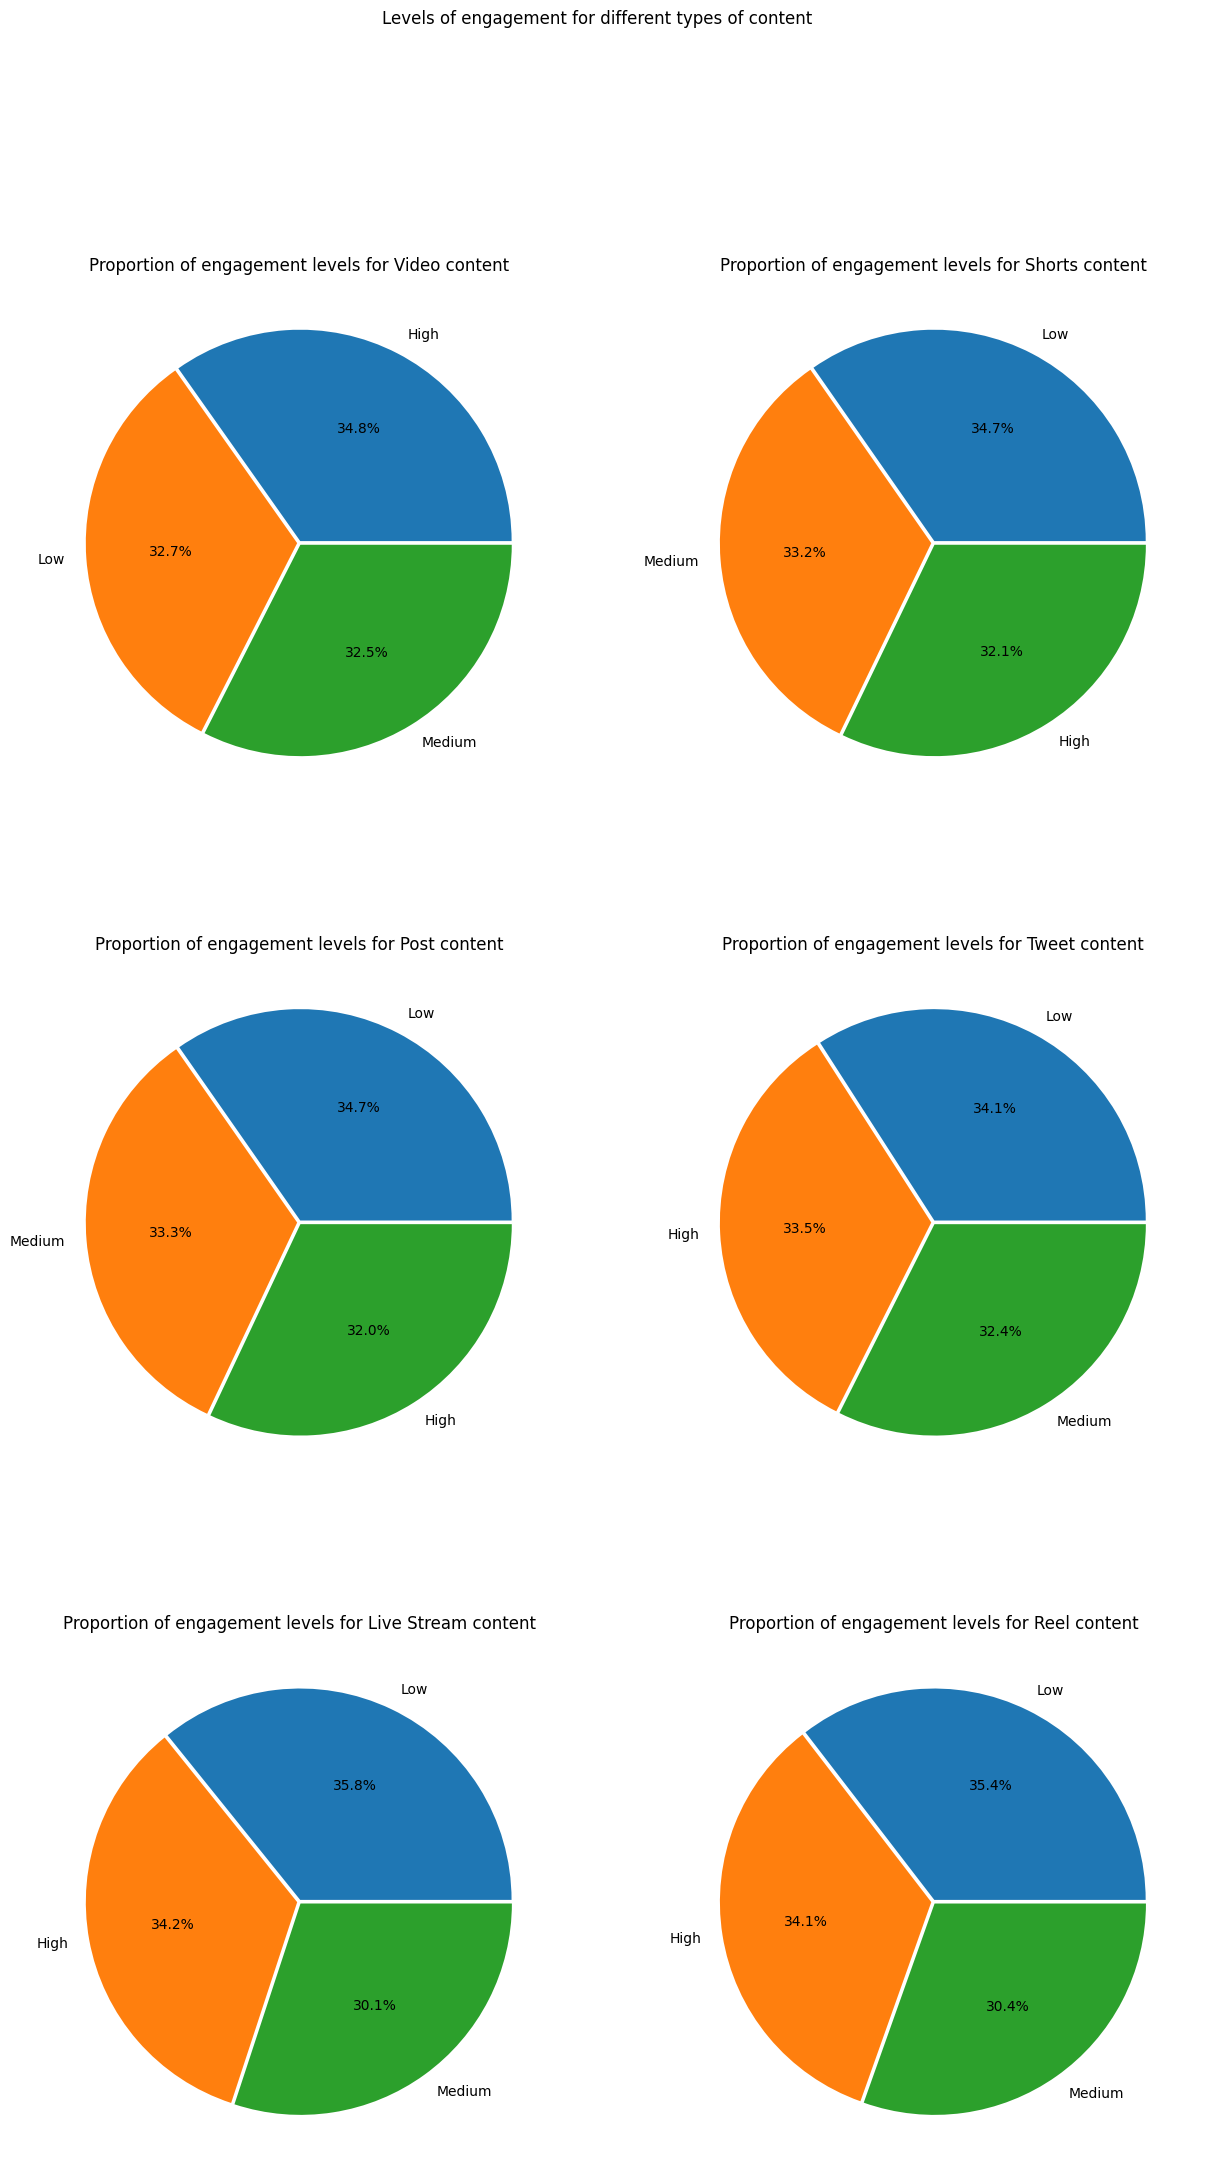

In [54]:
## engagement level with content types

import matplotlib.pyplot as mpl
import seaborn as sns
import pandas as pd

contents = socials['Content_Type'].unique()

fig, axes = mpl.subplots(3, 2, figsize=(15, 25))
fig.suptitle('Levels of engagement for different types of content')

for i, content in enumerate(contents):
    c_info = socials[socials['Content_Type'] ==  content]['Engagement_Level'].value_counts()
    ad = axes[i//2, i%2] ## shows how many plots per row
    ad.pie(x=c_info, labels=c_info.index, autopct='%1.1f%%', explode = [0.01,0.01,0.01])
    ad.set_title(f"Proportion of engagement levels for {content} content")
mpl.tight_layout()
mpl.show()